<a href="https://colab.research.google.com/github/LoQiseaking69/SephsBIOME/blob/master/Docs/Model/Tests/Utils/SynthDGenV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Synthetic Dataset Generation

This notebook demonstrates the generation of a sophisticated synthetic dataset, incorporating advanced techniques for NLP data generation and kinematic feature extraction.

In [1]:
%%capture
!pip install markovify

## NLP Data Generation Using Brown Corpus

In [11]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import nltk
from nltk.corpus import brown
import markovify
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.under_sampling import RandomUnderSampler

# Download the 'brown' corpus from nltk
nltk.download('brown')

# Save the brown corpus to a CSV file
def save_brown_corpus(file_path):
    try:
        # Extracting sentences from the brown corpus
        brown_sentences = [' '.join(words) for words in brown.sents()]
        # Converting to DataFrame
        df = pd.DataFrame(brown_sentences, columns=['sentence'])
        # Saving to CSV
        df.to_csv(file_path, index=False)
        return "File saved successfully."
    except Exception as e:
        return f"Error saving file: {e}"

# Example usage
file_save_status = save_brown_corpus('brown_corpus.csv')
print(file_save_status)

# Function to read a CSV file
def read_csv_file(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        return "File not found."

# Example usage
csv_data = read_csv_file('brown_corpus.csv')
print(csv_data)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


File saved successfully.
                                                sentence
0      The Fulton County Grand Jury said Friday an in...
1      The jury further said in term-end presentments...
2      The September-October term jury had been charg...
3      `` Only a relative handful of such reports was...
4      The jury said it did find that many of Georgia...
...                                                  ...
57335                                     S. J. Perelman
57336                            revulsion in the desert
57337  the doors of the D train slid shut , and as I ...
57338  She was a living doll and no mistake -- the bl...
57339  From what I was able to gauge in a swift , gre...

[57340 rows x 1 columns]


In [12]:
# Generate text data using Markov chains built from the Brown corpus
text = ' '.join(brown.words())
text_model = markovify.Text(text)

def generate_text_data(num_samples):
    return [text_model.make_short_sentence(100) for _ in range(num_samples)]


## Synthetic Dataset Generation Function

In [21]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import nltk
from nltk.corpus import brown

# Download the 'brown' corpus from nltk
nltk.download('brown')

# Function to generate text data from the brown corpus
def generate_text_data(num_samples):
    # Extracting sentences from the brown corpus
    brown_sentences = [' '.join(words) for words in brown.sents()]
    # Randomly selecting sentences to match the number of samples
    random_sentences = random.choices(brown_sentences, k=num_samples)
    return random_sentences

# Function to generate synthetic dataset
def generate_synthetic_dataset(num_samples=1000, num_sensors=128, num_actions=10, noise_level=0.05):
    timestamps = [datetime.now() + timedelta(seconds=i) for i in range(num_samples)]
    text_data = generate_text_data(num_samples)
    sensor_data = {}
    for i in range(num_sensors):
        period = np.random.randint(10, 100)
        sensor_data[f'sensor_{i}'] = np.sin(np.linspace(0, 2 * np.pi * period, num_samples)) + np.random.normal(0, noise_level, num_samples)
    action_data = np.random.randint(0, num_actions, num_samples)
    reward_data = np.random.uniform(-1, 1, num_samples)
    return pd.DataFrame({
        'timestamp': timestamps,
        'text_data': text_data,
        **sensor_data,
        'action': action_data,
        'reward': reward_data
    })

# Generate the dataset
synthetic_dataset = generate_synthetic_dataset()

# Save the dataset to a CSV file
synthetic_dataset.to_csv('SephsDataV3.csv', index=False)

# Inform that the file has been saved
print("Dataset saved as SephsDataV3.csv")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Dataset saved as SephsDataV3.csv


## Dataset Reorganization for Reinforcement Learning

In [22]:
def reorganize_for_rl(df, num_sensors=128):
    sensor_columns = [f'sensor_{i}' for i in range(num_sensors)]
    action_counts = df['action'].value_counts()
    min_count = action_counts.min()
    balanced_df = pd.concat([df[df['action'] == action].sample(min_count) for action in action_counts.index])
    return balanced_df

# Read the dataset from the CSV file
df = pd.read_csv('SephsDataV3.csv')

# Reorganize the dataset for reinforcement learning
reorganized_df = reorganize_for_rl(df)

# Optionally, you can save the reorganized dataframe to a new CSV
# reorganized_df.to_csv('SephsDataV3_Reorganized.csv', index=False)

# Print or use the reorganized dataframe as needed
print(reorganized_df)

                      timestamp  \
869  2024-02-07 16:53:42.133730   
456  2024-02-07 16:46:49.132866   
385  2024-02-07 16:45:38.132739   
954  2024-02-07 16:55:07.133894   
94   2024-02-07 16:40:47.132100   
..                          ...   
140  2024-02-07 16:41:33.132216   
275  2024-02-07 16:43:48.132503   
702  2024-02-07 16:50:55.133349   
521  2024-02-07 16:47:54.132988   
186  2024-02-07 16:42:19.132314   

                                             text_data  sensor_0  sensor_1  \
869  Works by J. C. Bach , Anton Craft , Joseph Hay... -0.979127 -0.945798   
456                         It was too unprecedented .  0.548422 -0.576890   
385  Mr. and Mrs. Robert Brown will return next wee...  0.714708  0.071900   
954  The second really new development this year wa... -0.914490 -0.828083   
94   A brood of twenty-eight born at Brookfield Zoo... -0.906964 -0.045778   
..                                                 ...       ...       ...   
140           Globocnik built the

## Feature Engineering

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def feature_engineering(df):
    scaler = StandardScaler()
    for col in df.columns:
        if col.startswith('sensor_'):
            # Standardize the sensor data
            df[col] = scaler.fit_transform(df[[col]])

            # Add some random noise to introduce variability
            noise_strength = 0.05  # Adjust this value based on the desired level of noise
            noise = np.random.normal(0, noise_strength, df[col].shape)
            df[col] += noise

    return df

def wrangle_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Parse the timestamp
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Handle missing values (if any)
    data.fillna(method='ffill', inplace=True)

    # Apply feature engineering to sensor data
    data = feature_engineering(data)

    # Keep a separate DataFrame for text data if needed for other tasks
    text_data = None
    if 'text_data' in data.columns:
        text_data = data['text_data'].copy()

    # Encode the 'text_data' using TF-IDF
    if 'text_data' in data.columns:
        data['text_data'].fillna('', inplace=True)  # Replace NaN values in text data
        tfidf = TfidfVectorizer(max_features=50)
        tfidf_features = tfidf.fit_transform(data['text_data']).toarray()
        tfidf_df = pd.DataFrame(tfidf_features, columns=[f'text_{i}' for i in range(tfidf_features.shape[1])])
        data = pd.concat([data, tfidf_df], axis=1).drop('text_data', axis=1)

    return data, text_data

# Usage
file_path = '/content/SephsDataV3.csv'  # Update to your file path
processed_data, original_text_data = wrangle_data(file_path)

# Display the first few rows of the processed data
processed_data.head(3)


timestamp  sensor_0  sensor_1  sensor_2  sensor_3  \
0 2024-02-07 16:39:13.131895  0.071258 -0.011715 -0.058809  0.125713   
1 2024-02-07 16:39:14.131906  0.456311  0.437133  0.386515  0.488295   
2 2024-02-07 16:39:15.131909  1.014009  0.831779  1.021586  0.781515   

   sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  ...   text_40  text_41  \
0  0.031090 -0.067587 -0.001817 -0.167867 -0.165327  ...  0.000000      0.0   
1  0.651176  0.671026  0.172228  0.335818  0.265519  ...  0.000000      0.0   
2  1.234591  1.226551  0.477339  0.700735  0.426667  ...  0.386644      0.0   

   text_42  text_43  text_44  text_45  text_46  text_47  text_48  text_49  
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[3 rows x 181 columns]

# original_text_data contains the unaltered text data for other NLP tasks

In [25]:
original_text_data.head(13)

0     At last , I thought , she's recovering her spi...
1     He had a pinkish-white complexion , a small st...
2     This time he turned westward , to the middle A...
3     Thomas is a regression from the technical orig...
4     The March gain plus this optimism has been enc...
5     He came through from the Fleet Bar , which was...
6       This doctrine was repugnant to my moral sense .
7     Airmail was used for the addresses outside the...
8     When he opened the door , there stood Eugene ,...
9     The difficulty was that each day seemed to pro...
10    It brought men out of bed and sent them into h...
11    With its power to investigate , the Senate can...
12    What to buy out of the year's grist of nearly ...
Name: text_data, dtype: object

In [27]:
df = pd.read_csv('/content/SephsDataV3.csv')
df.head(3)

timestamp  \
0  2024-02-07 16:39:13.131895   
1  2024-02-07 16:39:14.131906   
2  2024-02-07 16:39:15.131909   

                                           text_data  sensor_0  sensor_1  \
0  At last , I thought , she's recovering her spi...  0.042974 -0.017977   
1  He had a pinkish-white complexion , a small st...  0.393757  0.340672   
2  This time he turned westward , to the middle A...  0.681831  0.557591   

   sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  ...  \
0 -0.029800  0.084910  0.046582 -0.028224 -0.004253 -0.115638  ...   
1  0.244456  0.291298  0.485779  0.489313  0.147328  0.219795  ...   
2  0.755541  0.561035  0.852084  0.841188  0.313776  0.497993  ...   

   sensor_120  sensor_121  sensor_122  sensor_123  sensor_124  sensor_125  \
0    0.044627    0.003045   -0.022642    0.006137   -0.123161   -0.053859   
1    0.472026    0.302938    0.413517    0.234442    0.229960    0.422536   
2    0.904782    0.666918    0.764307    0.562987    0.364964    0.695102   

   sensor_126  sensor_127  action    reward  
0   -0.002778   -0.023011       3 -0.073466  
1    0.562726    0.271259       9 -0.583589  
2    0.895223    0.481604       1 -0.437140  

[3 rows x 132 columns]

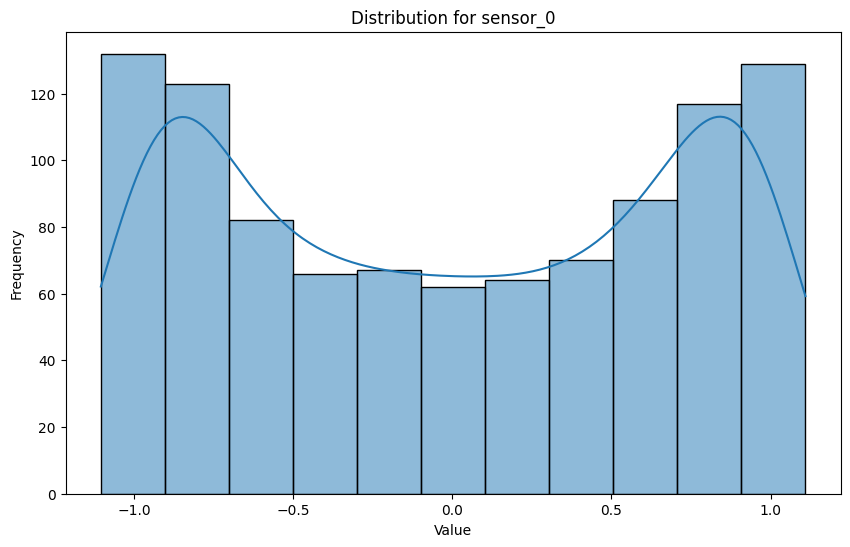

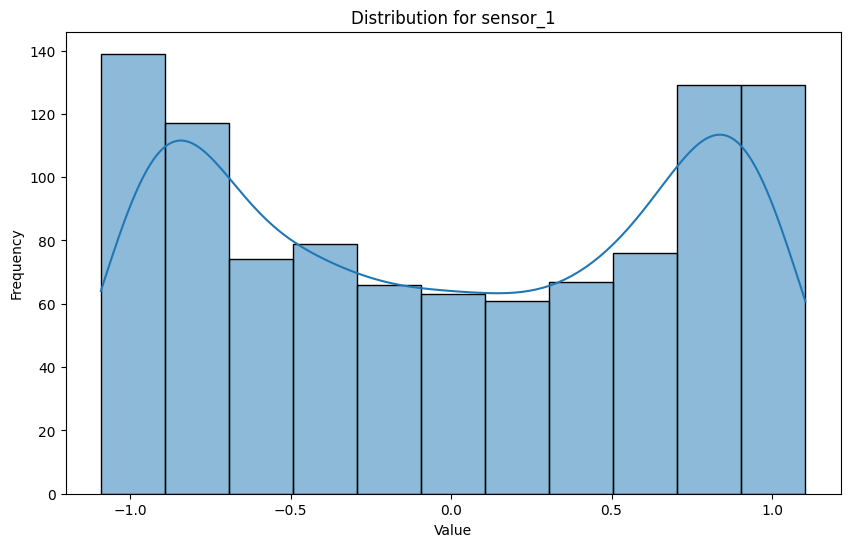

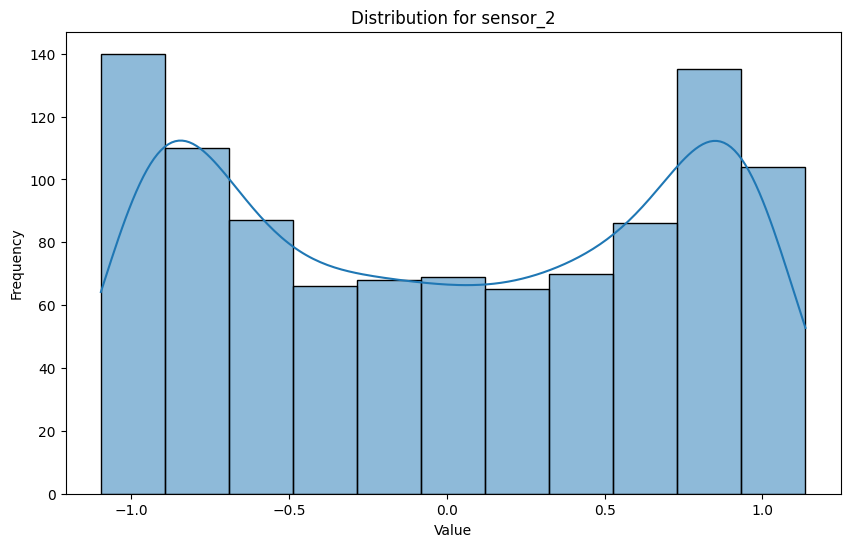

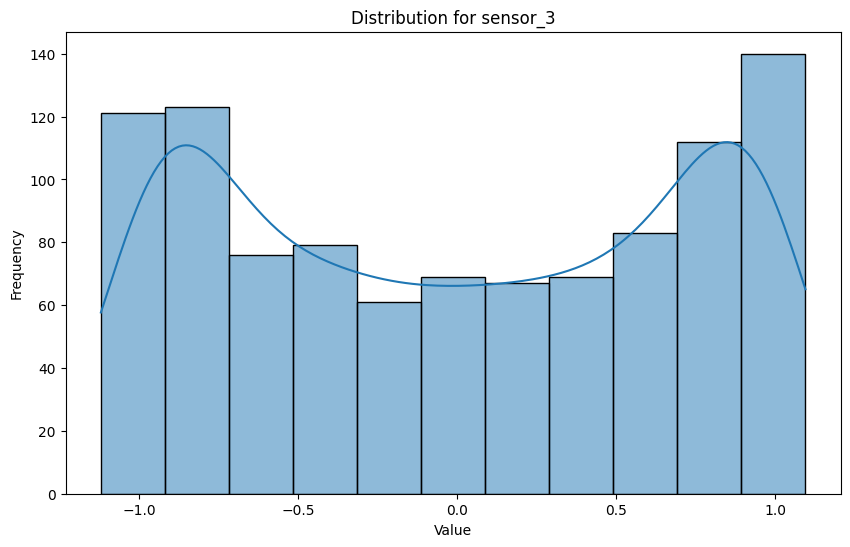

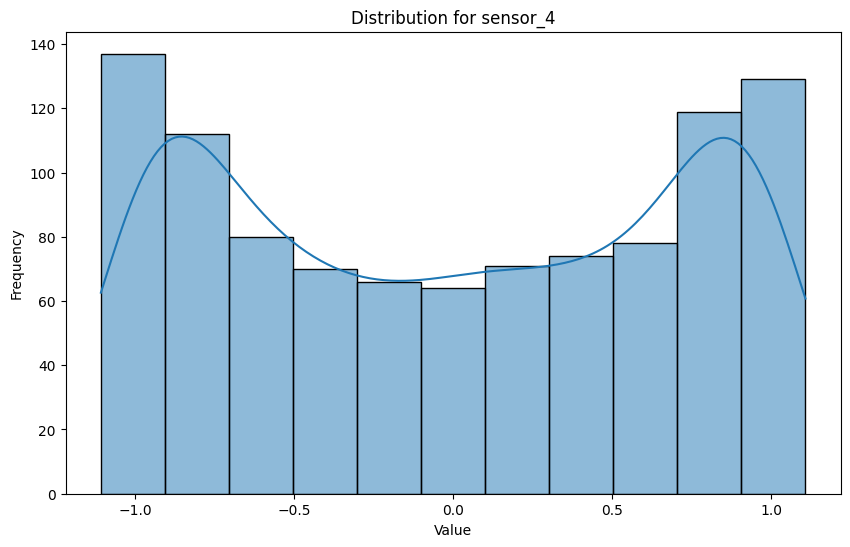

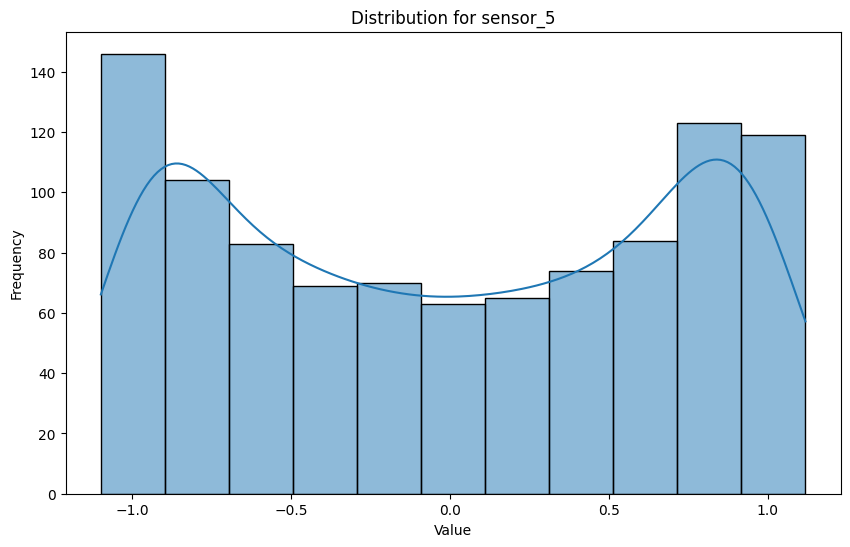

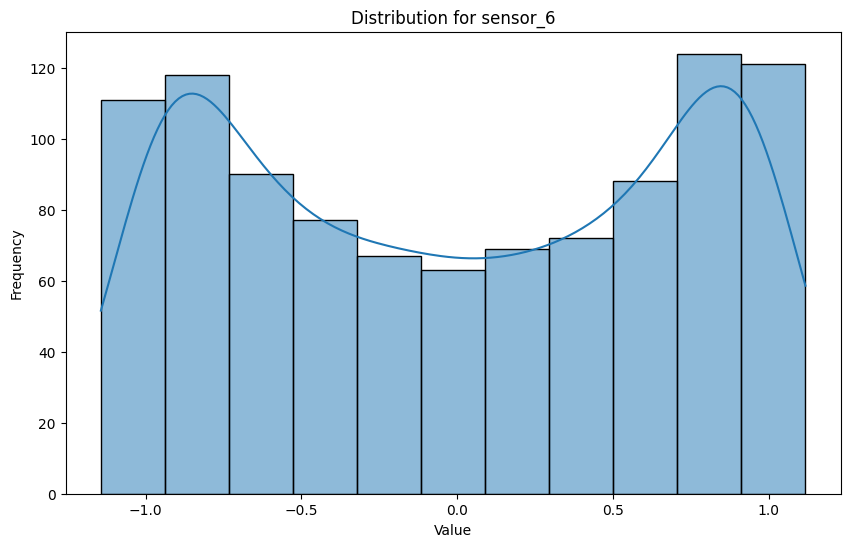

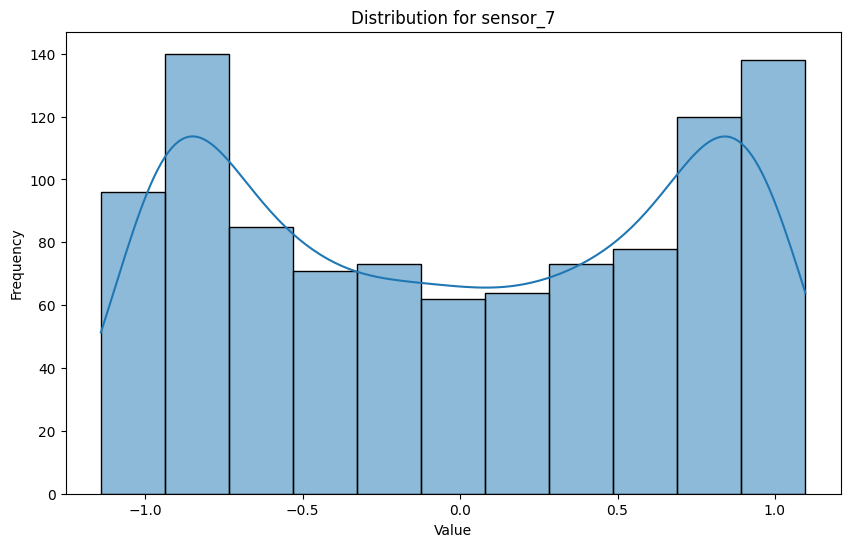

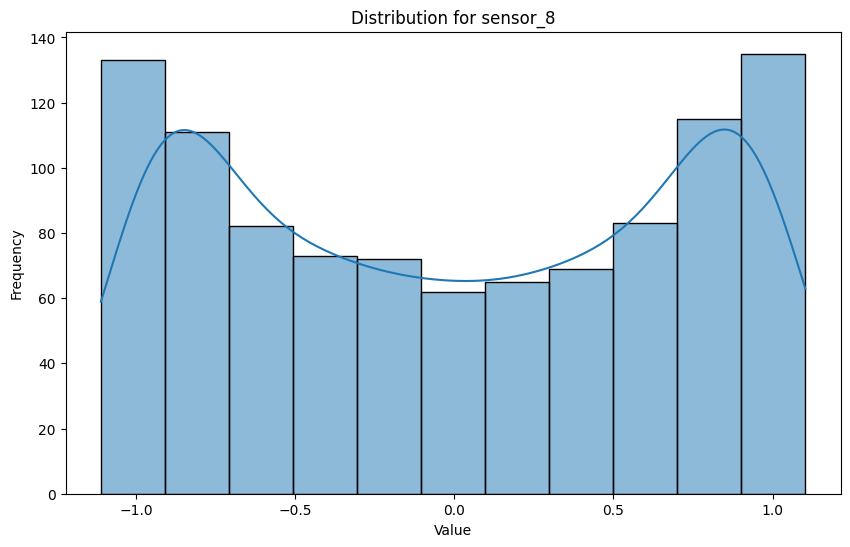

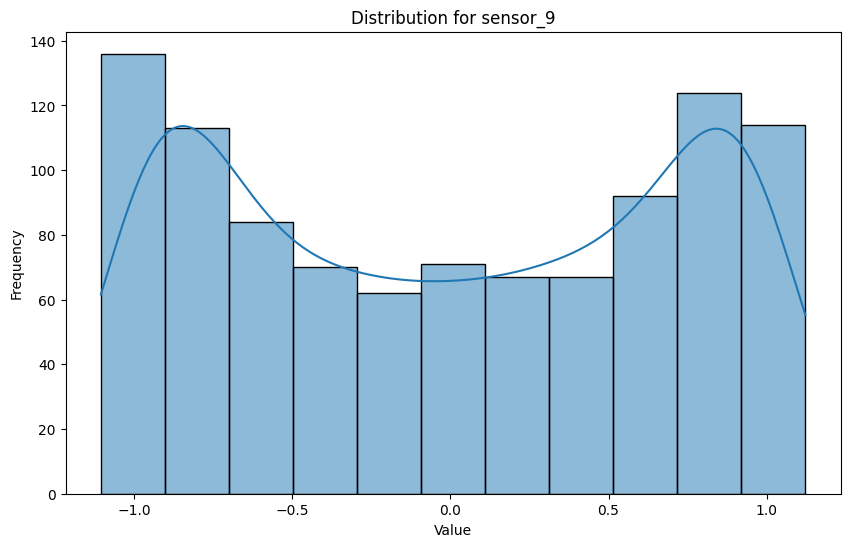

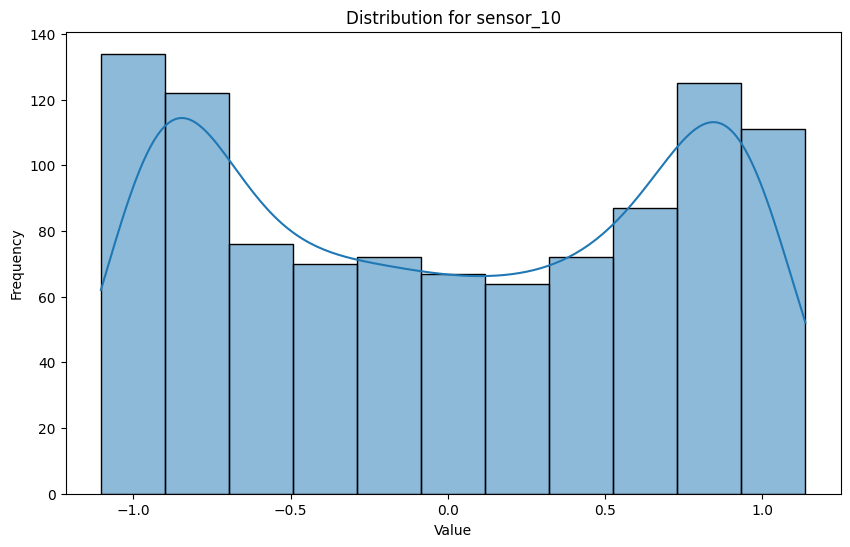

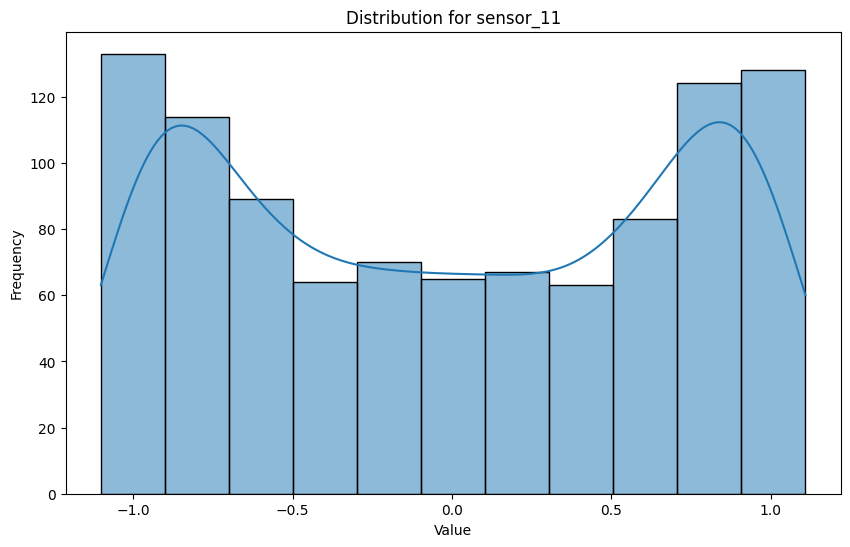

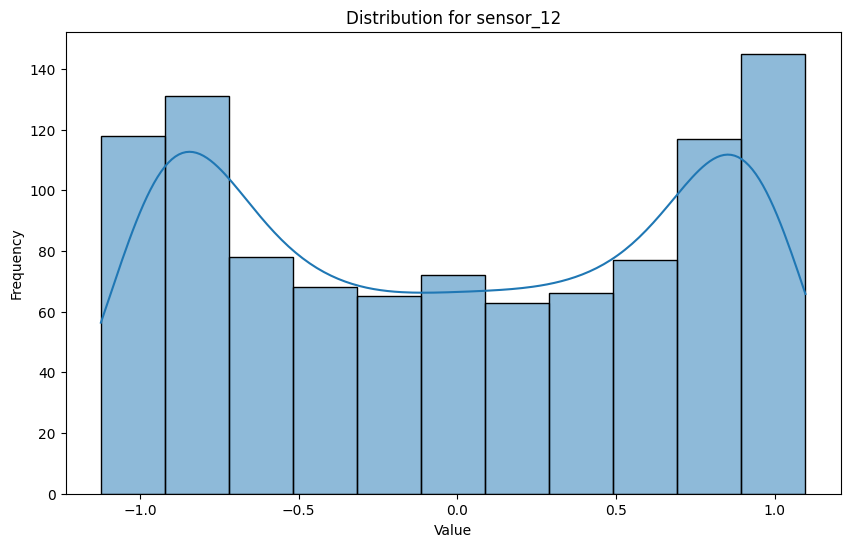

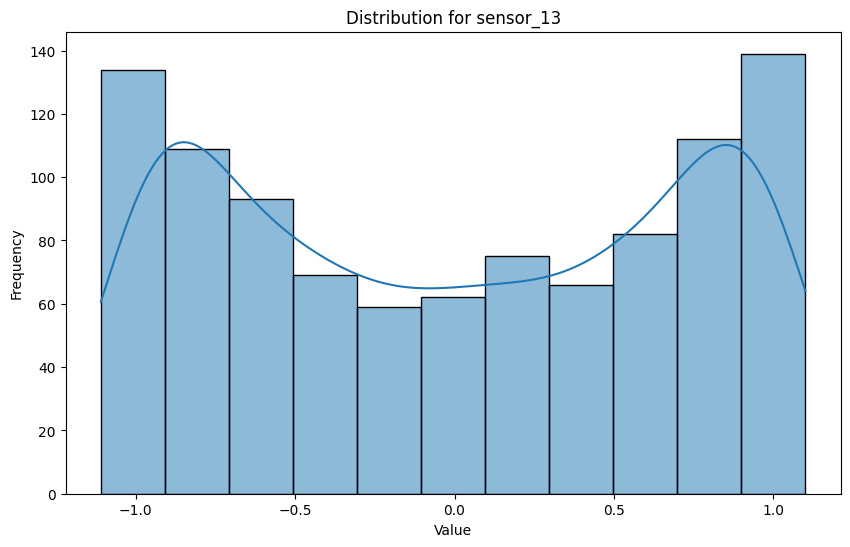

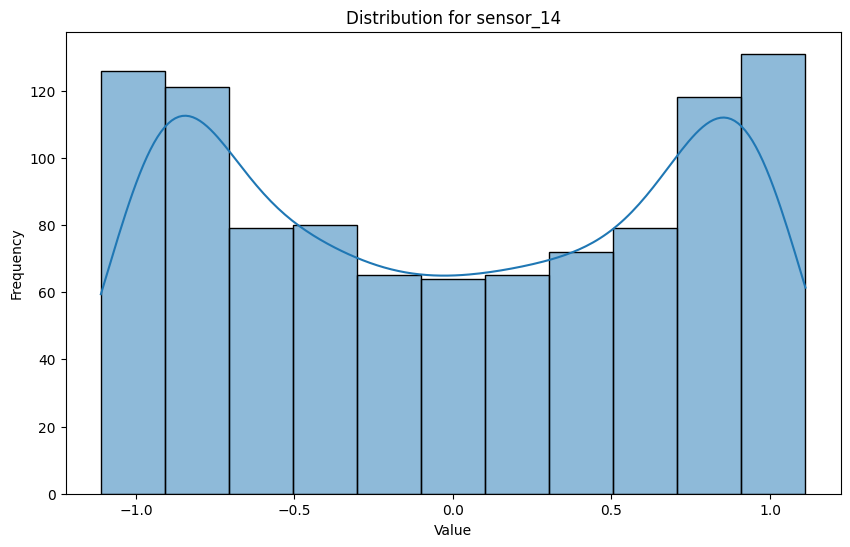

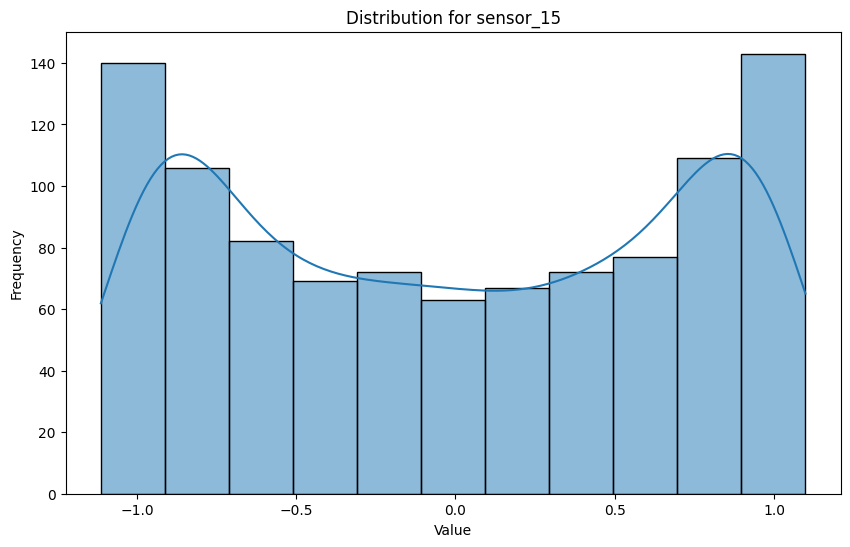

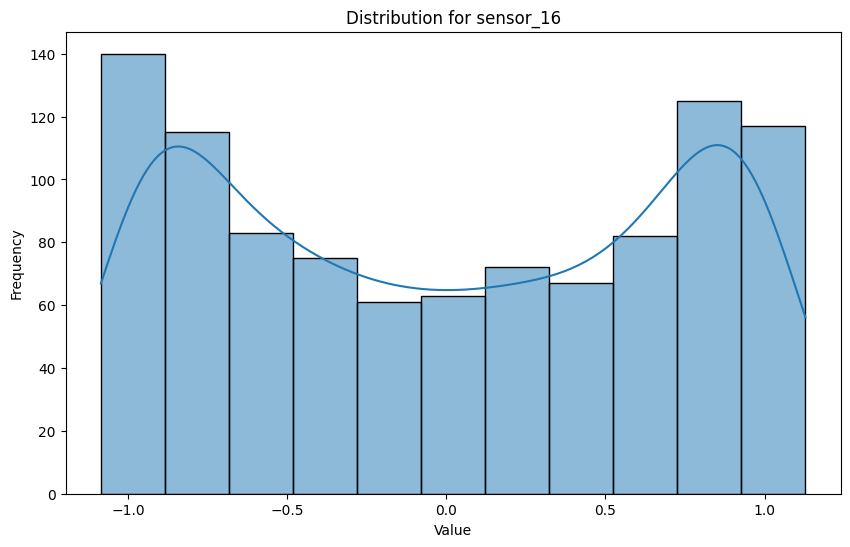

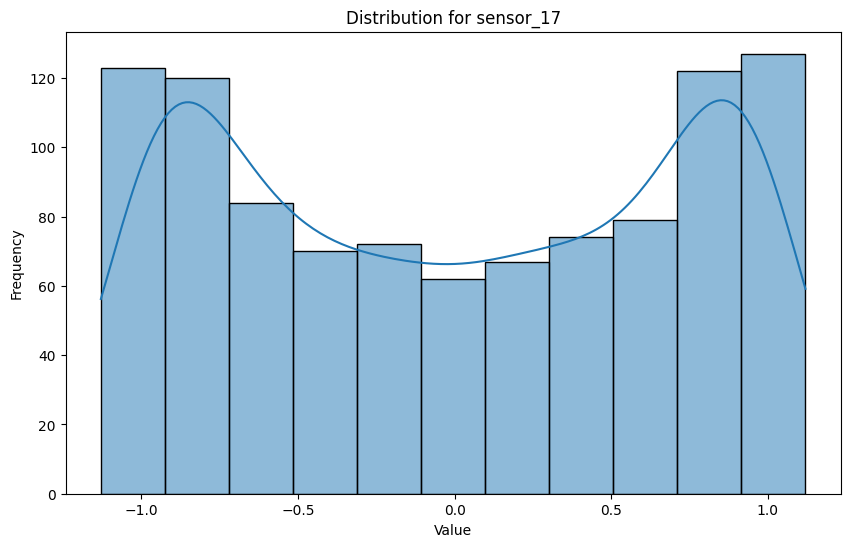

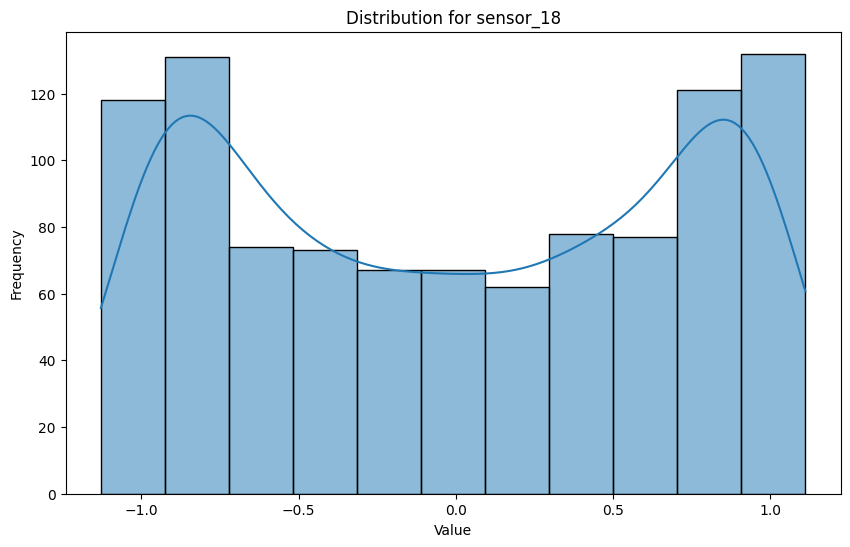

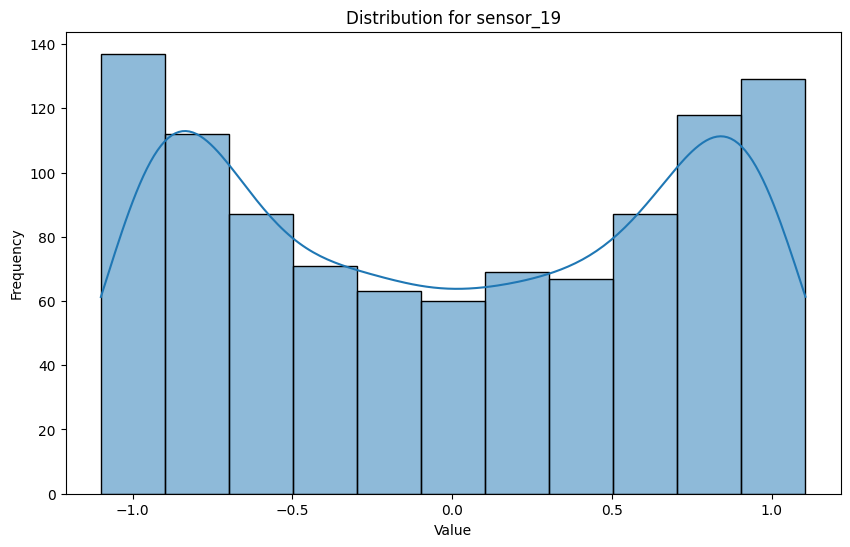

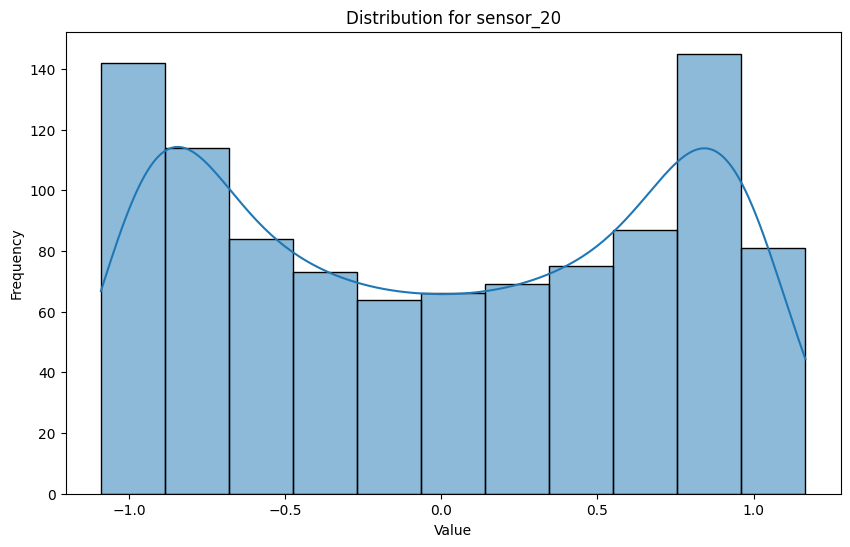

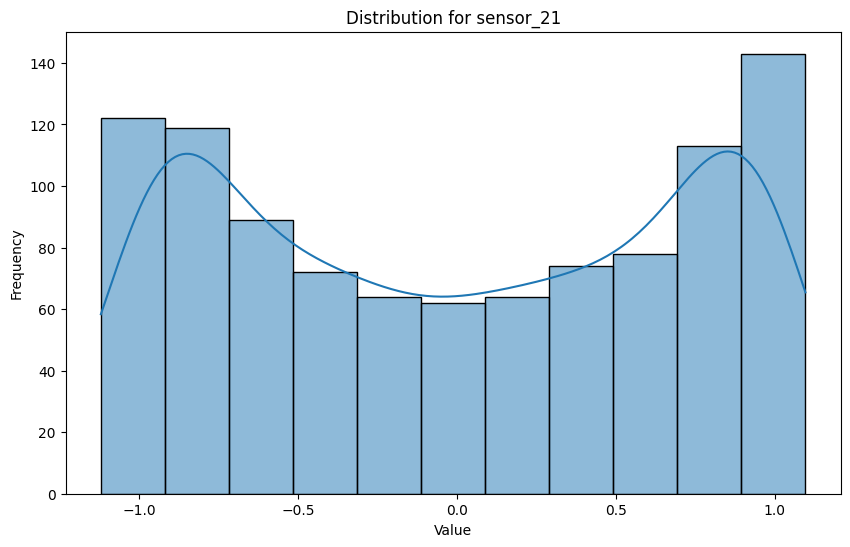

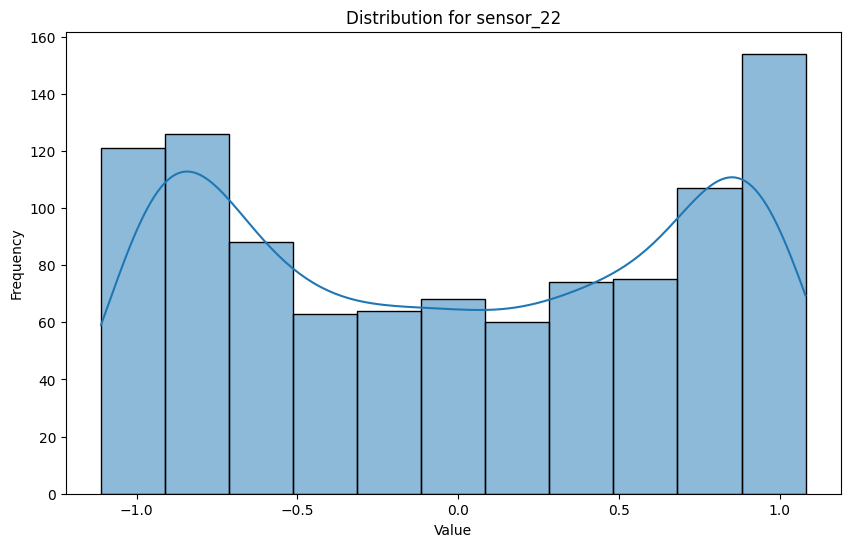

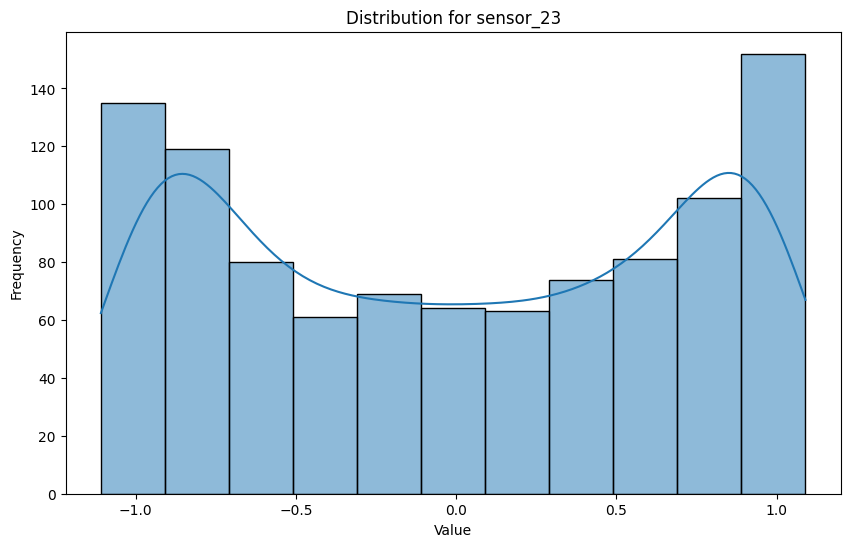

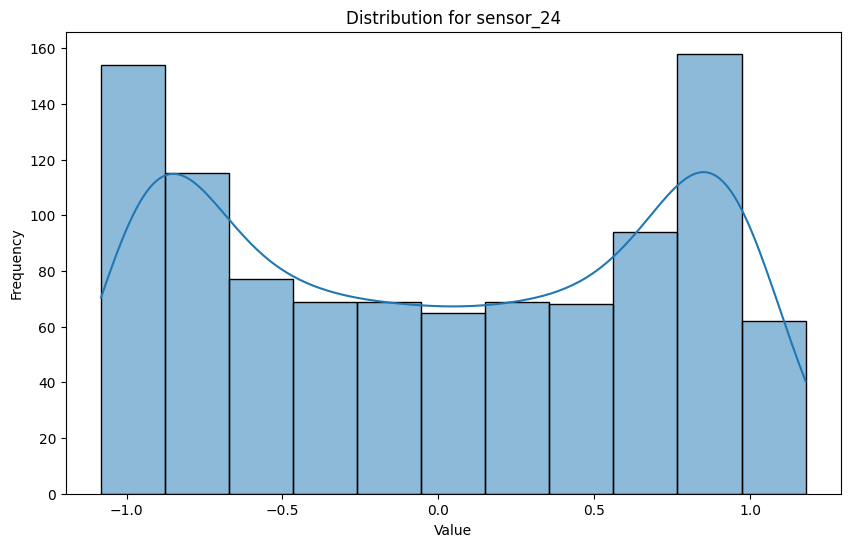

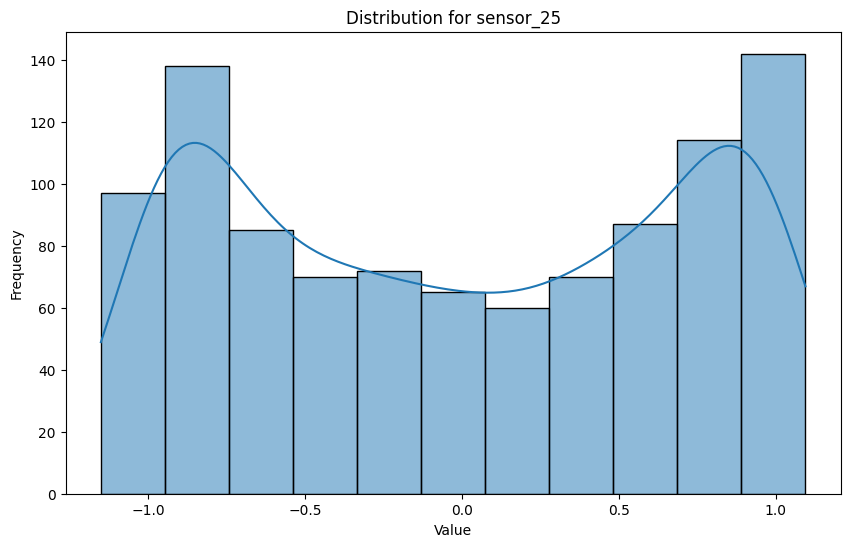

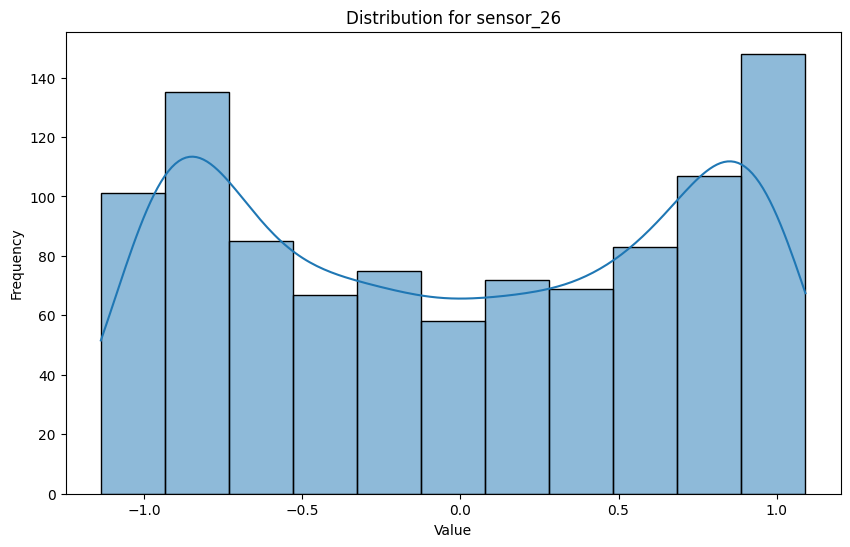

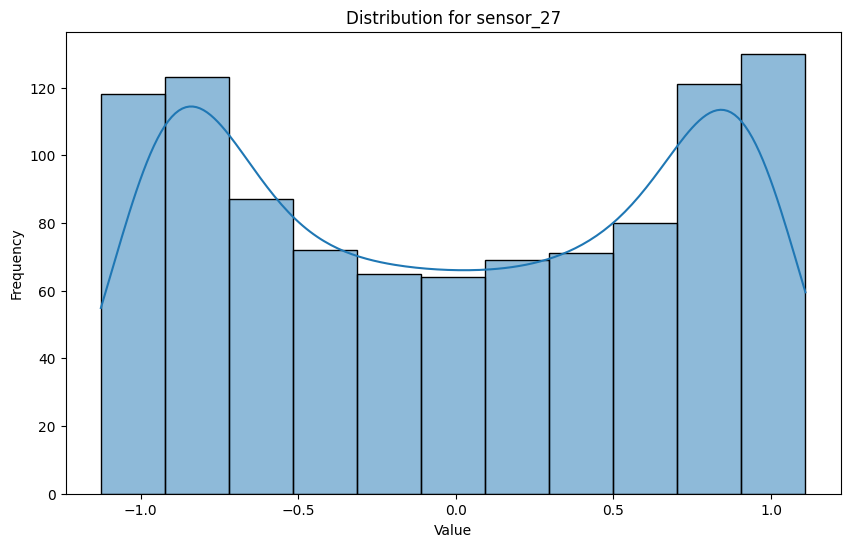

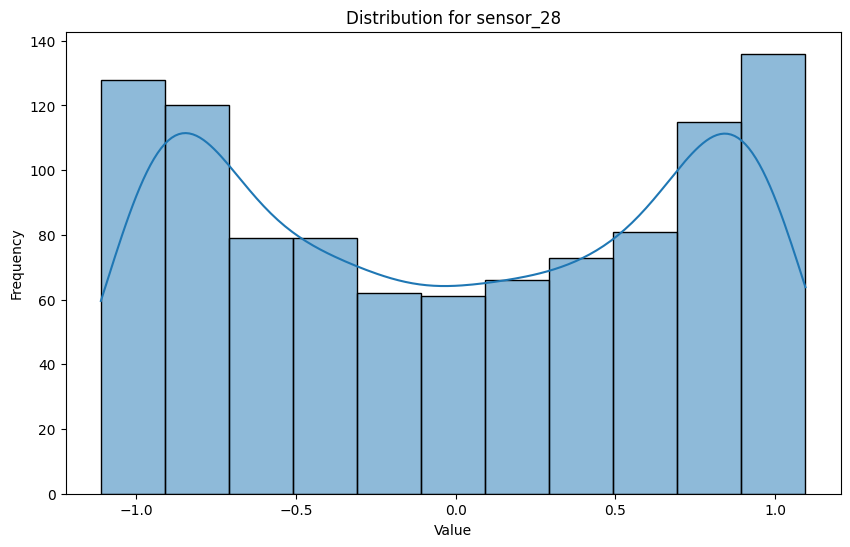

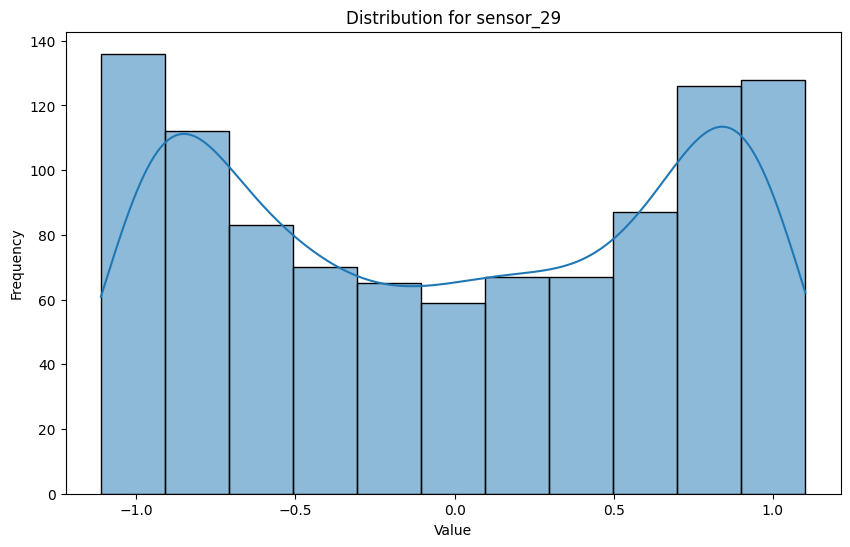

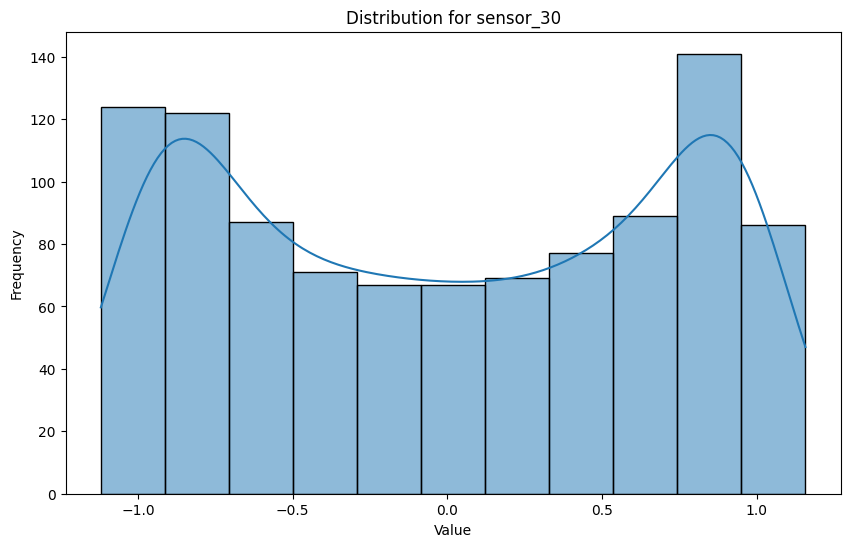

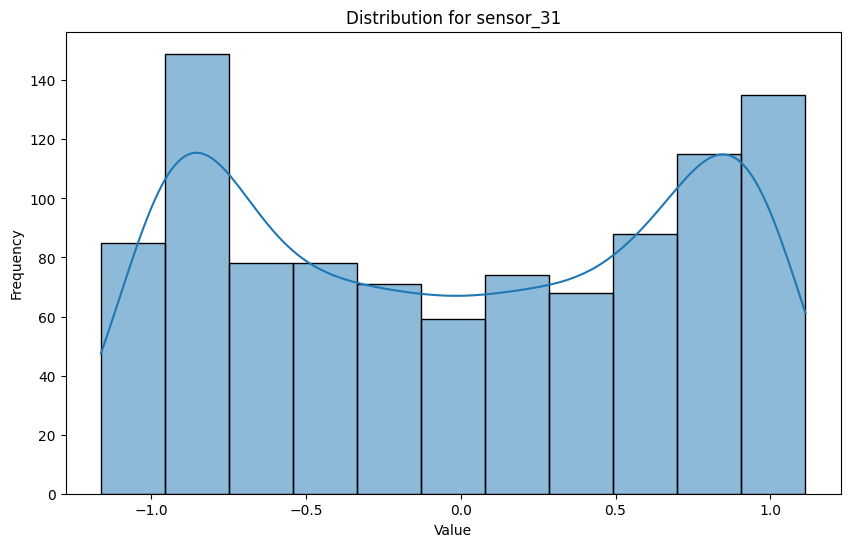

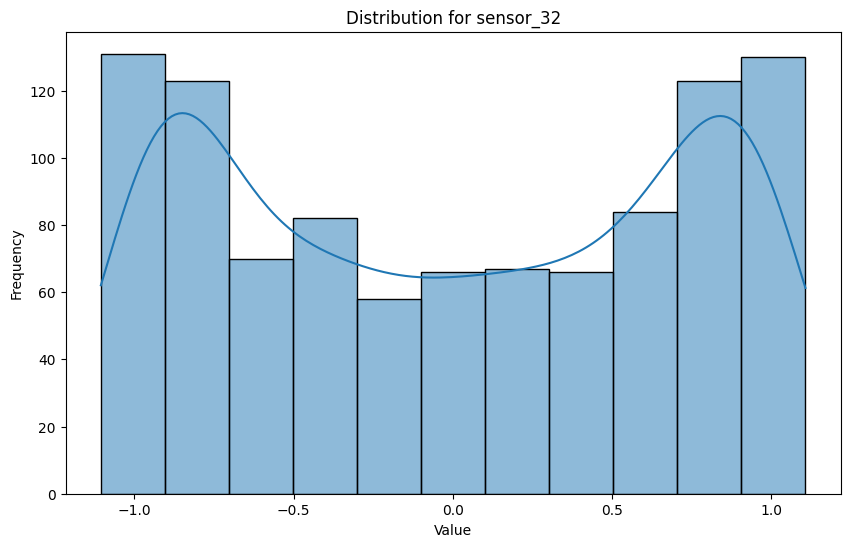

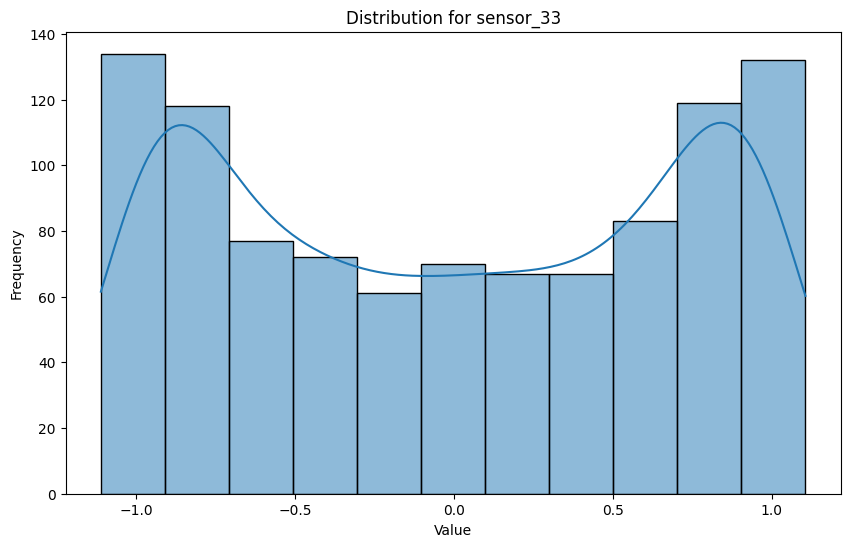

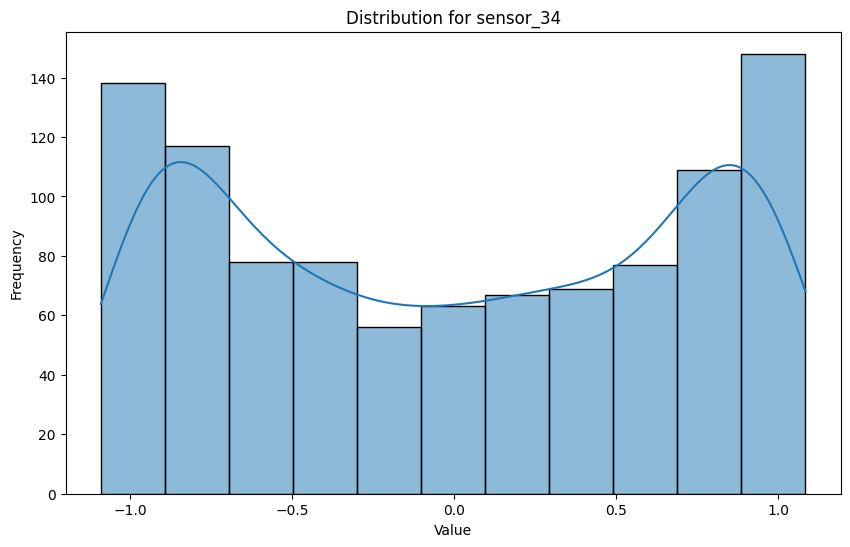

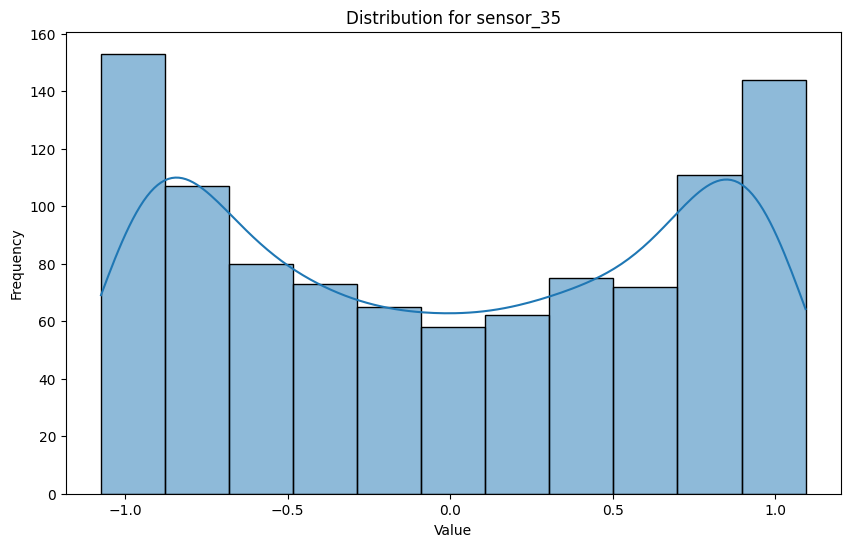

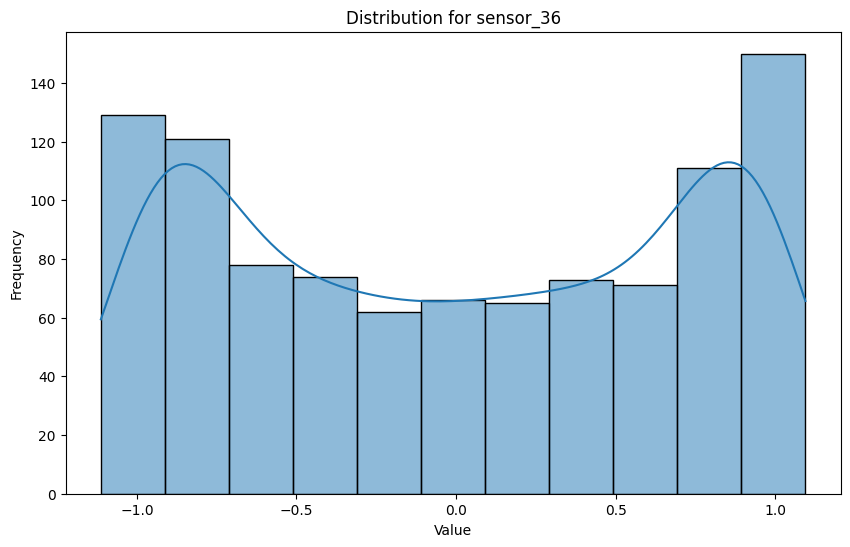

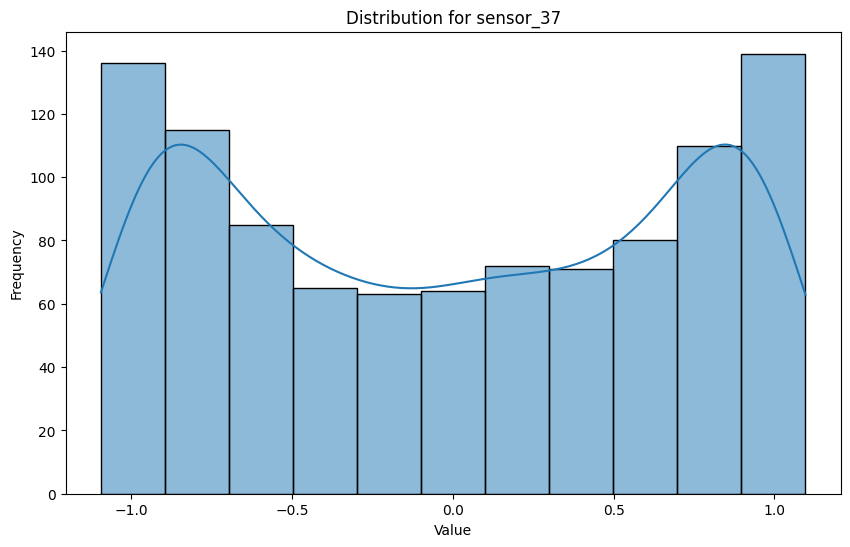

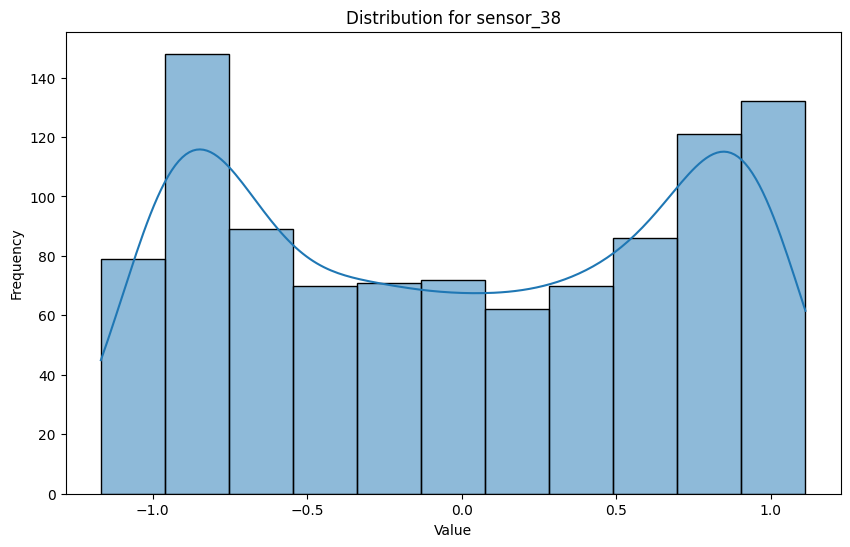

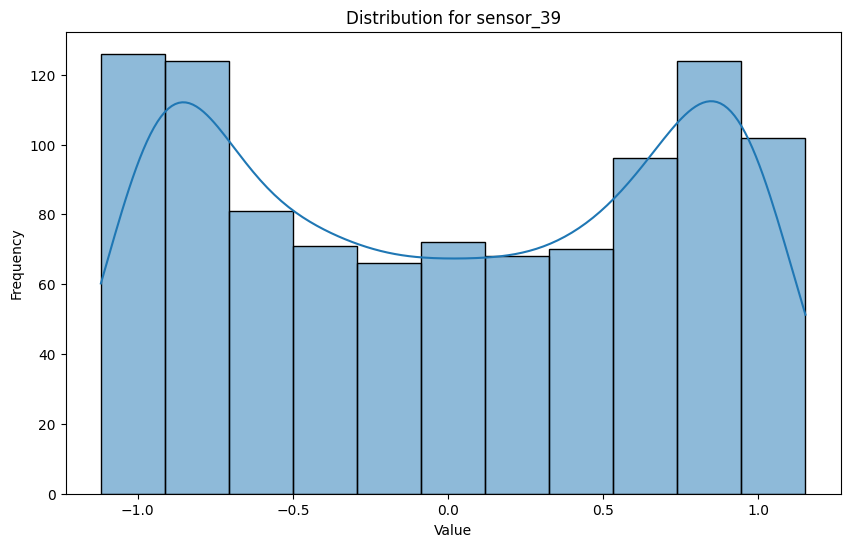

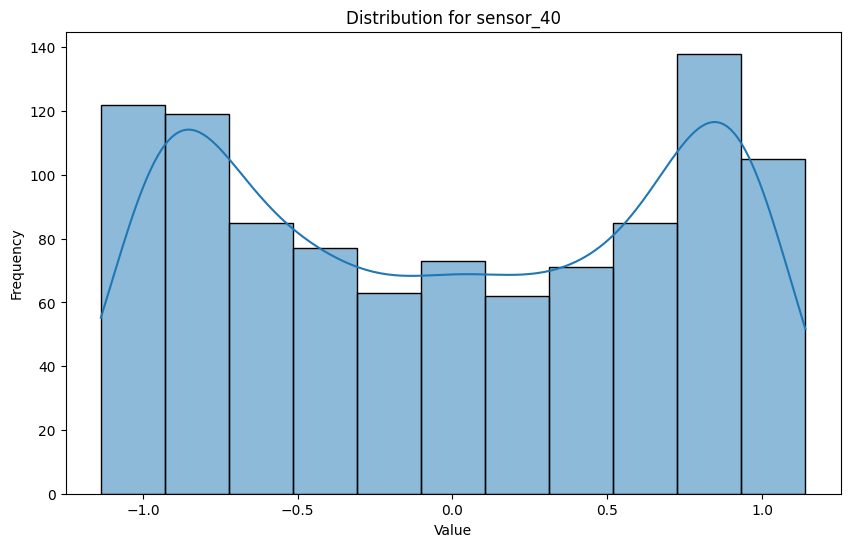

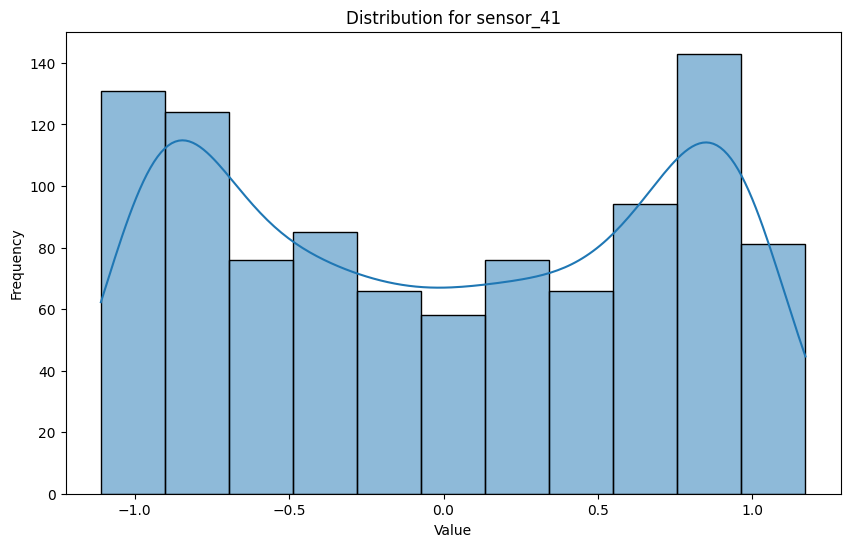

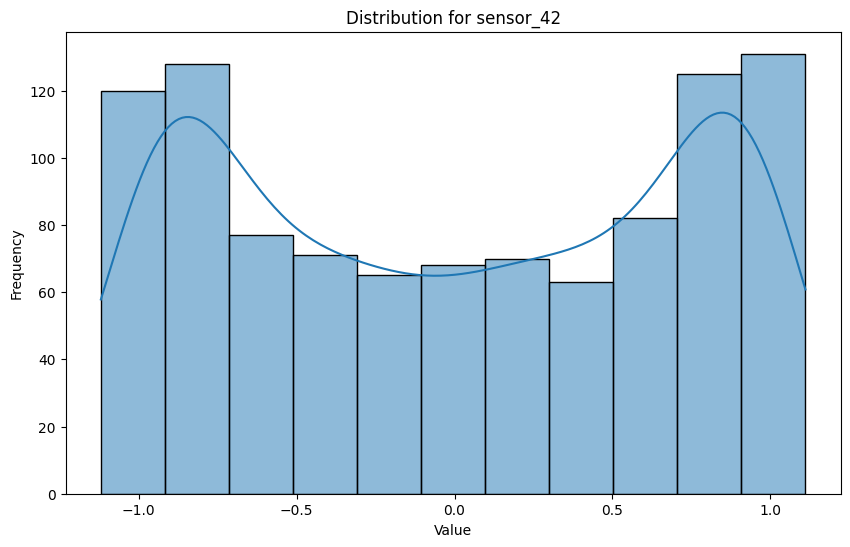

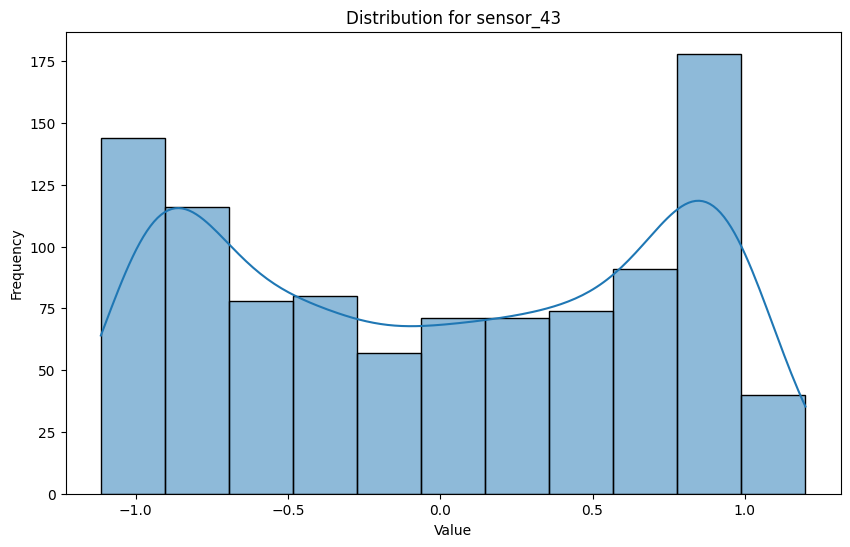

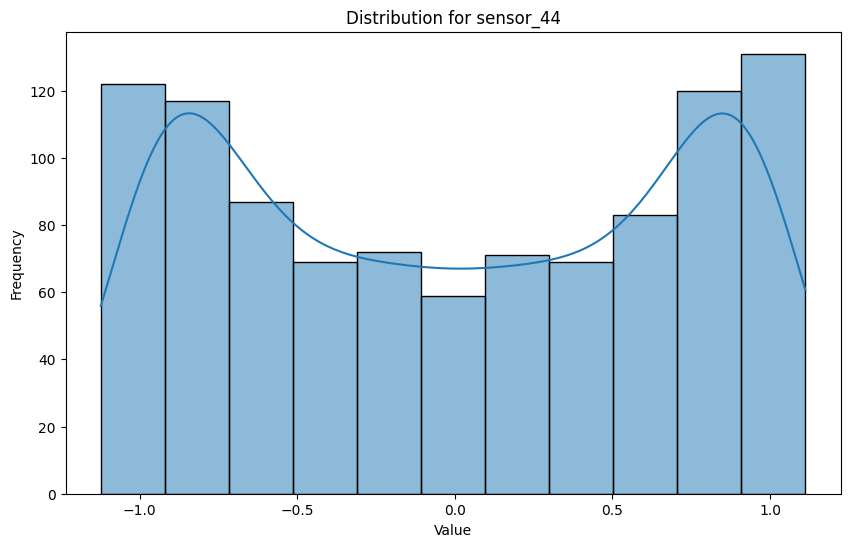

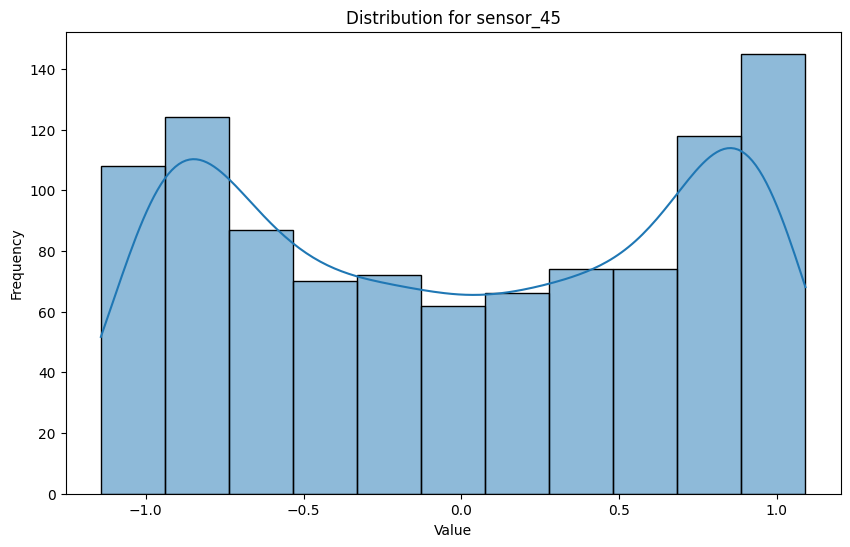

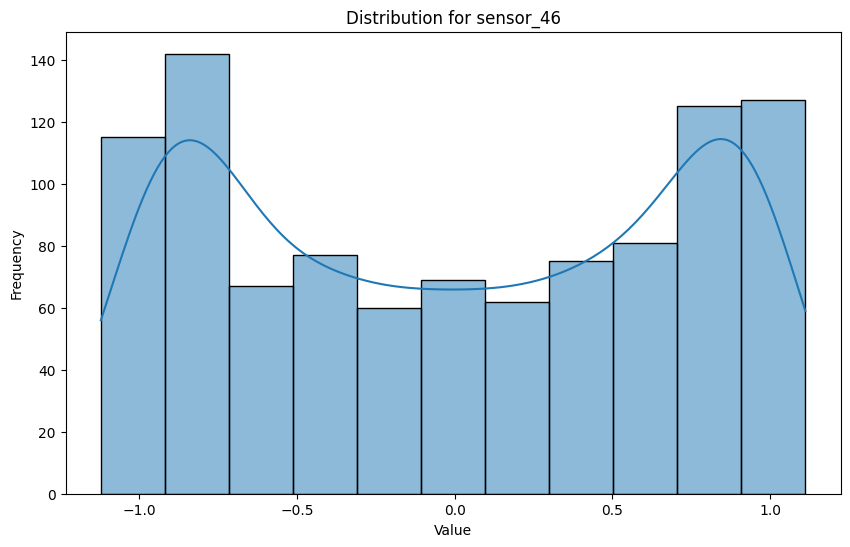

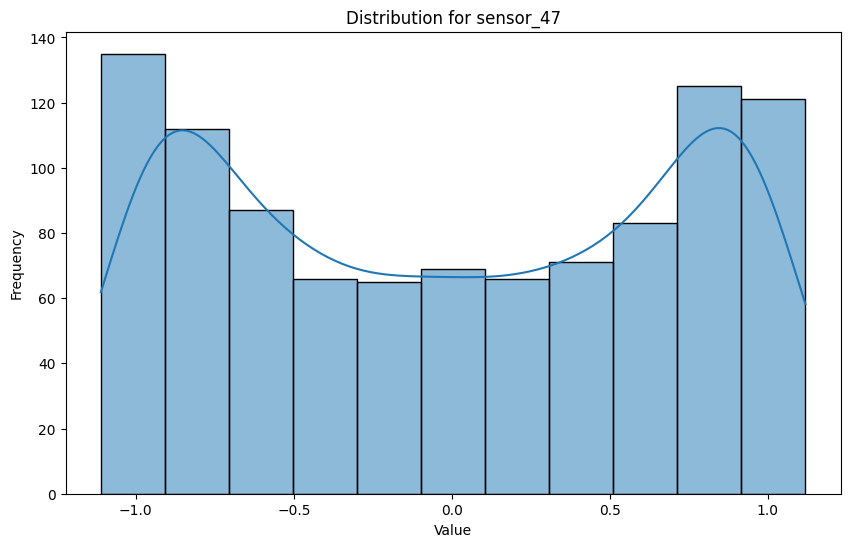

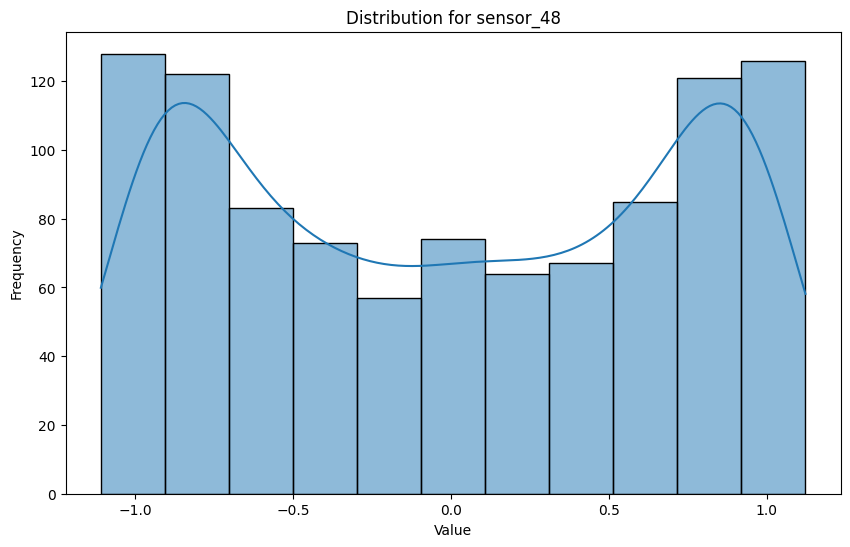

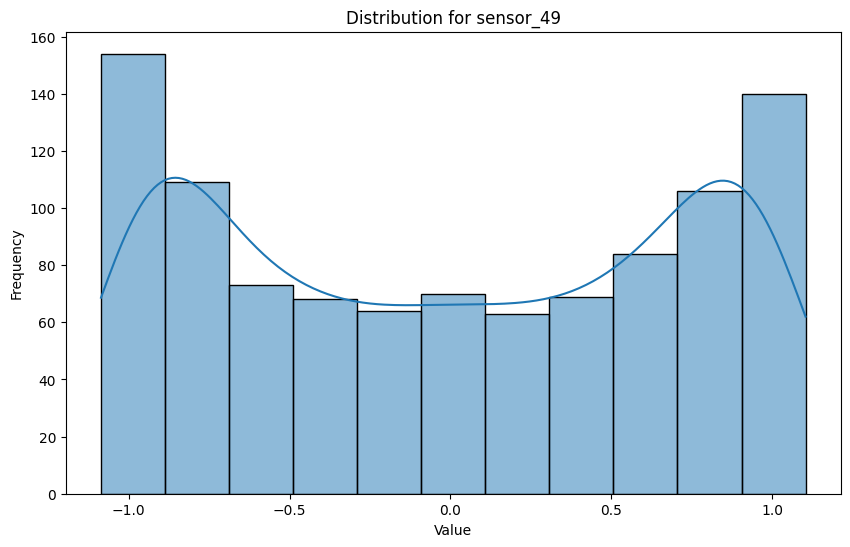

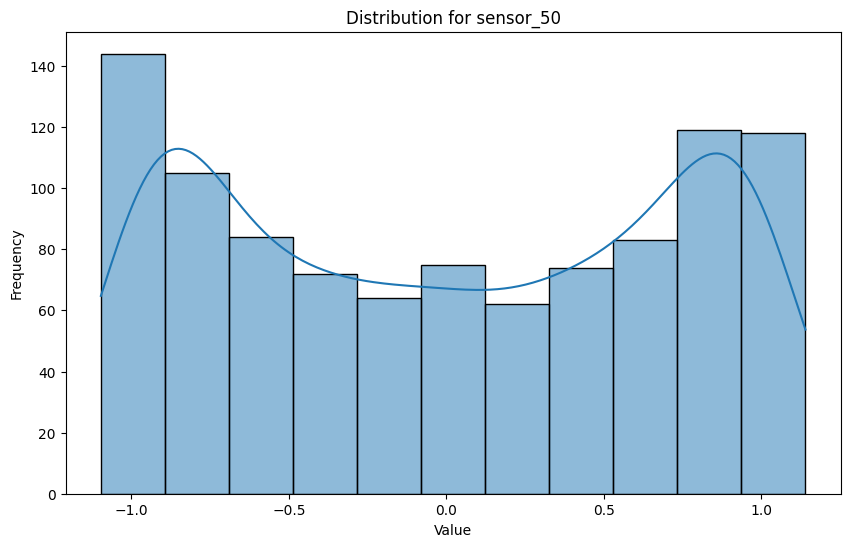

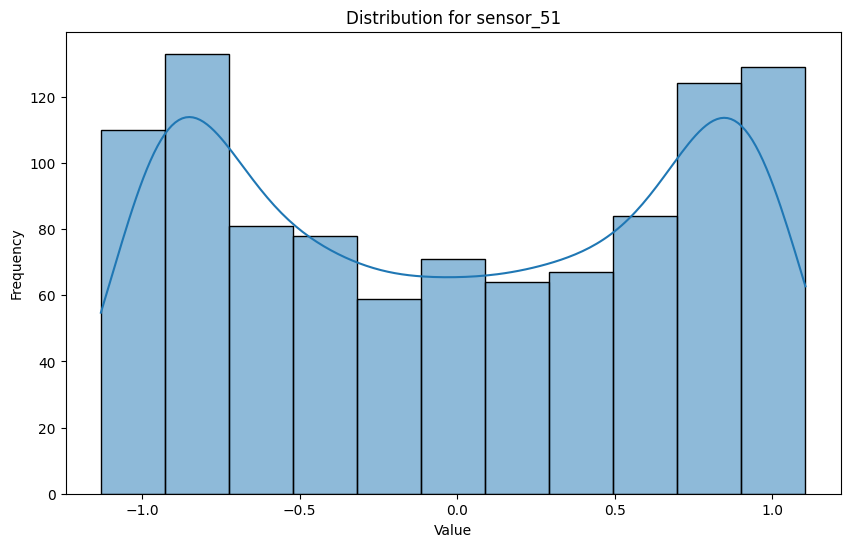

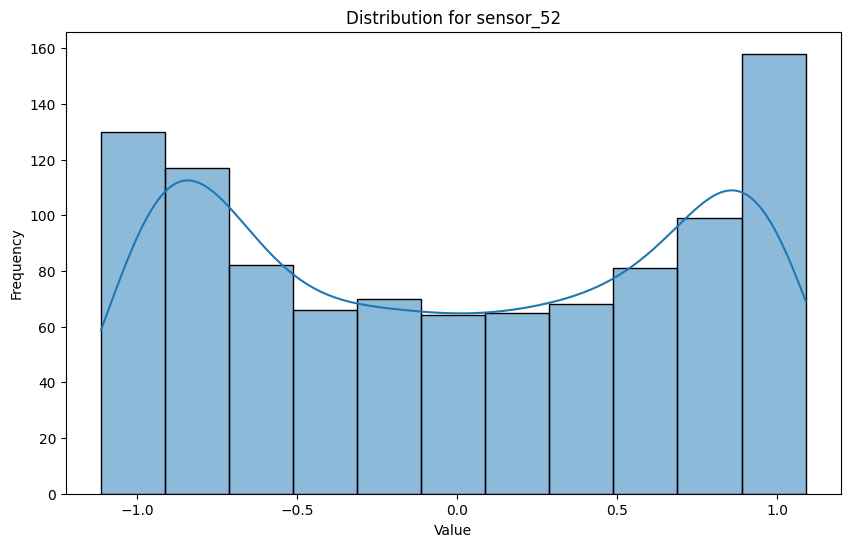

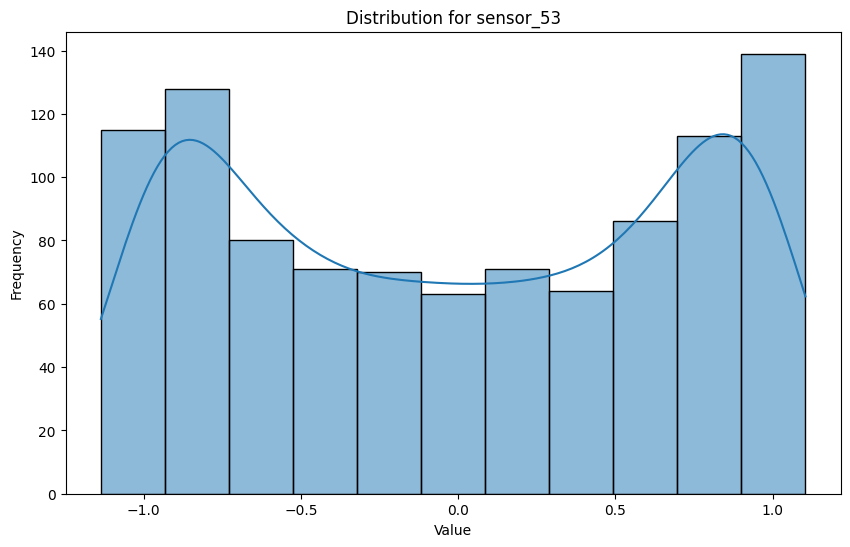

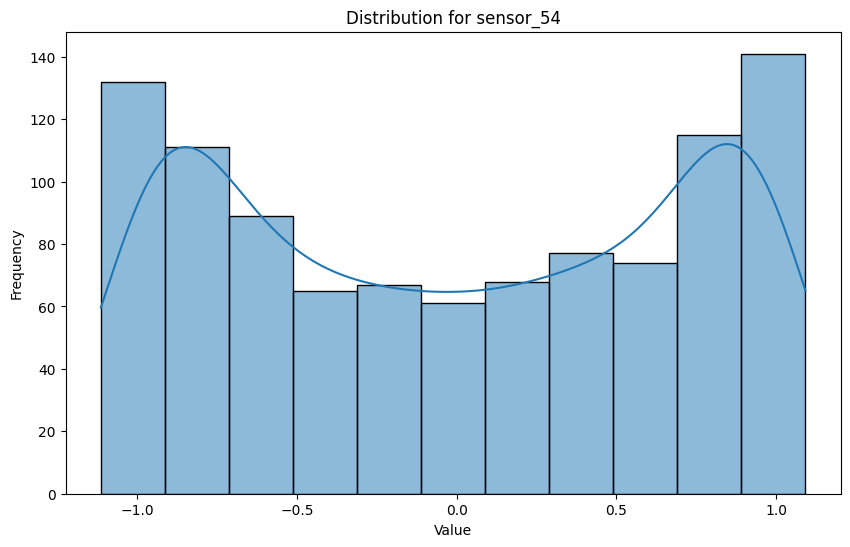

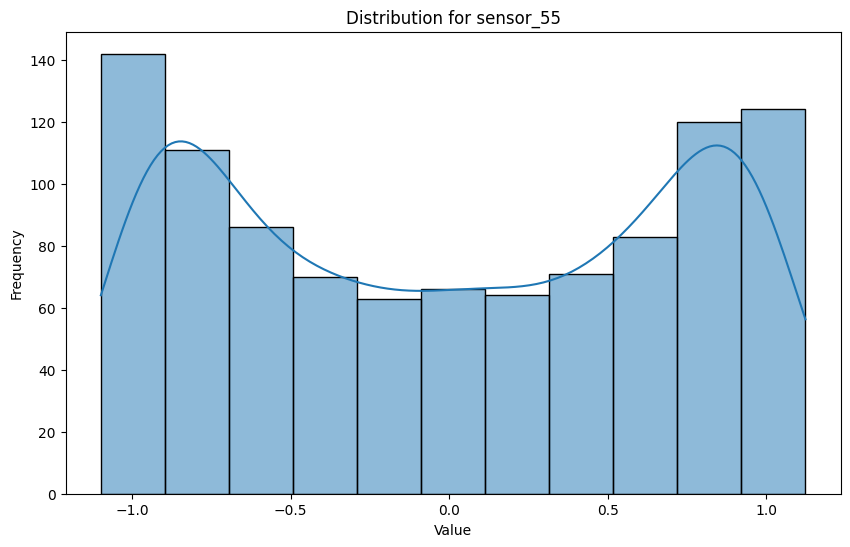

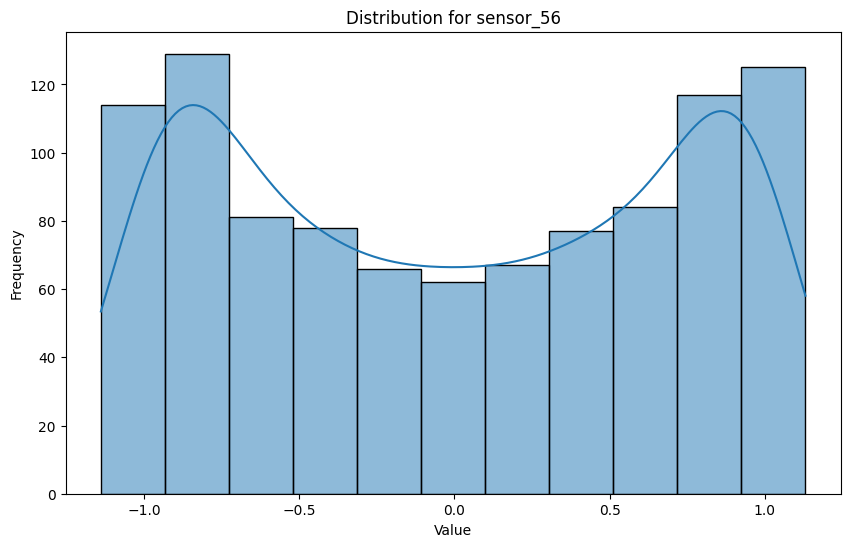

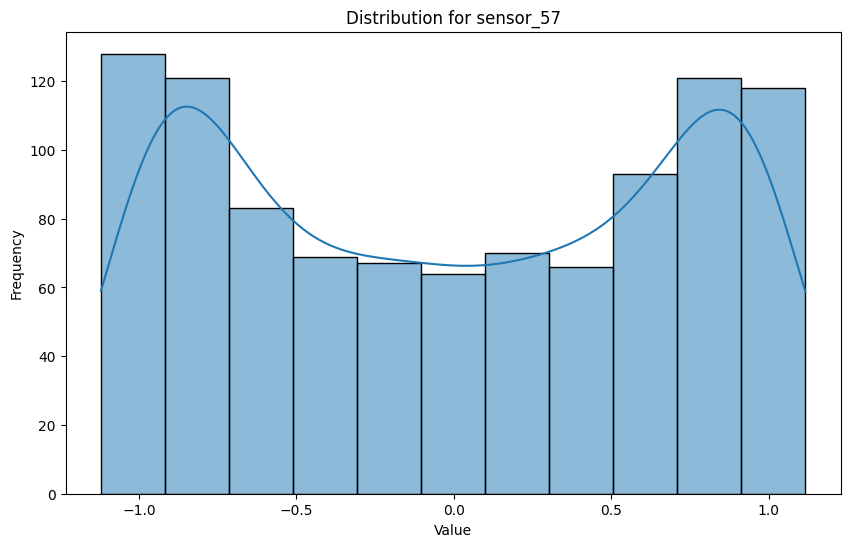

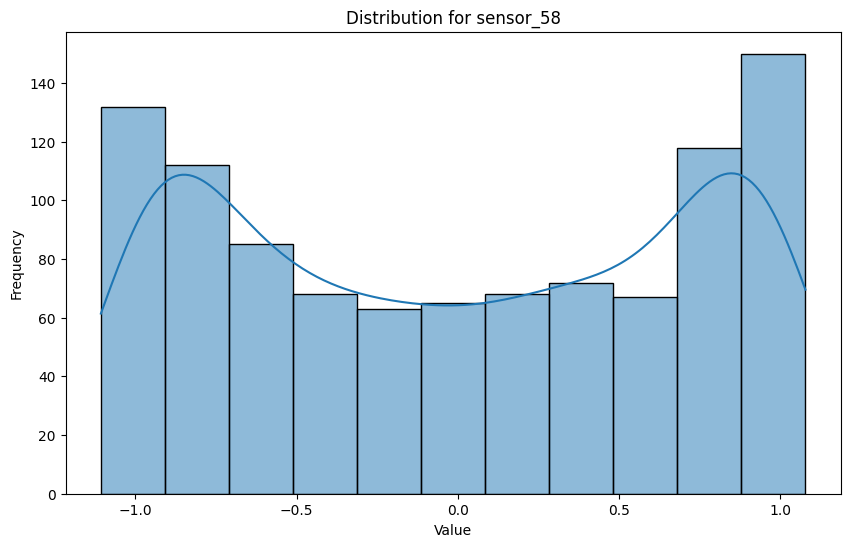

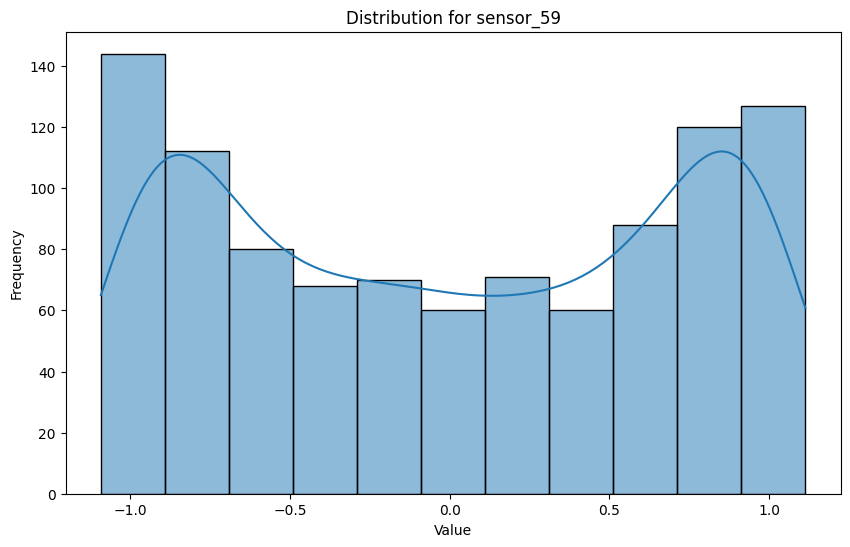

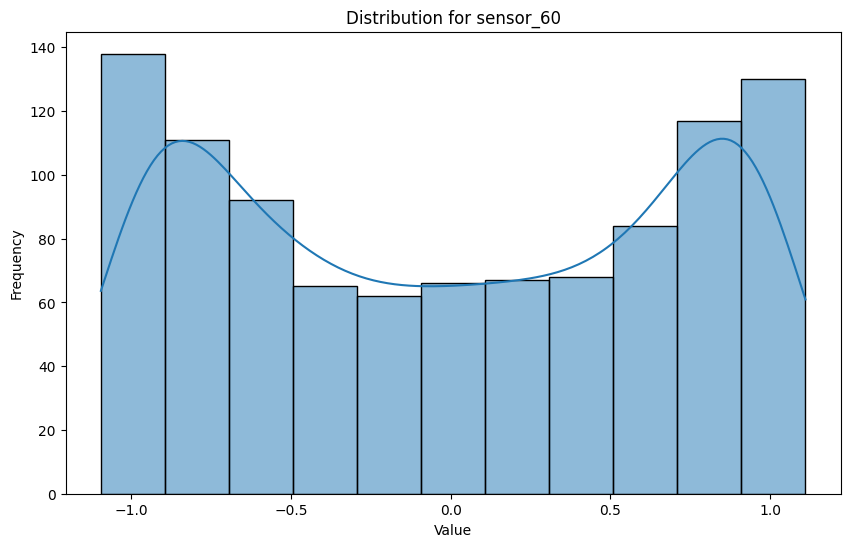

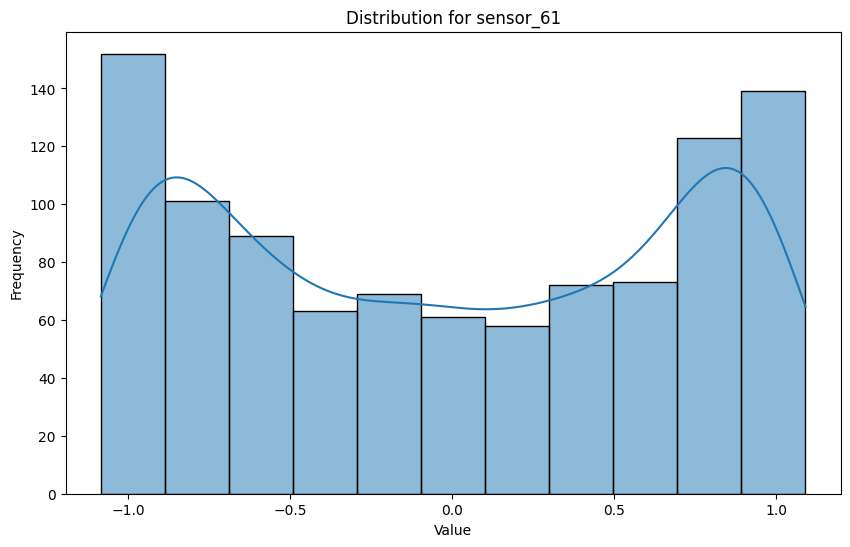

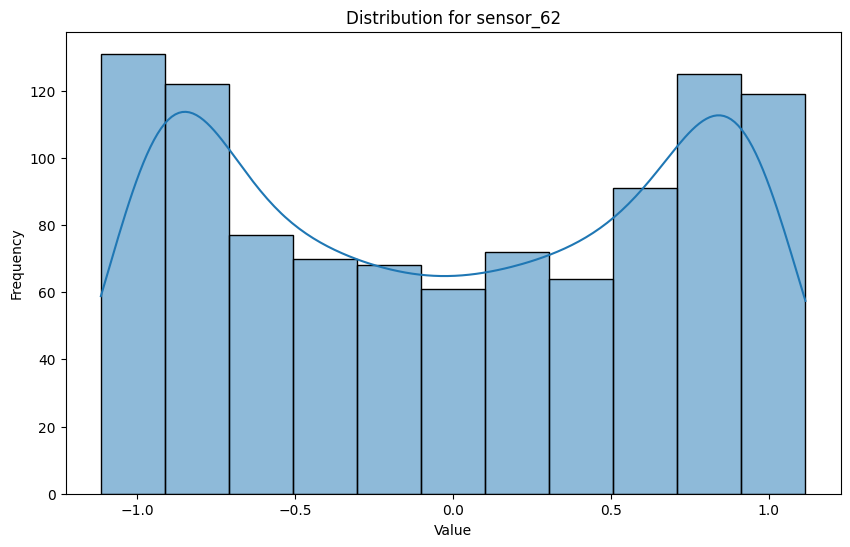

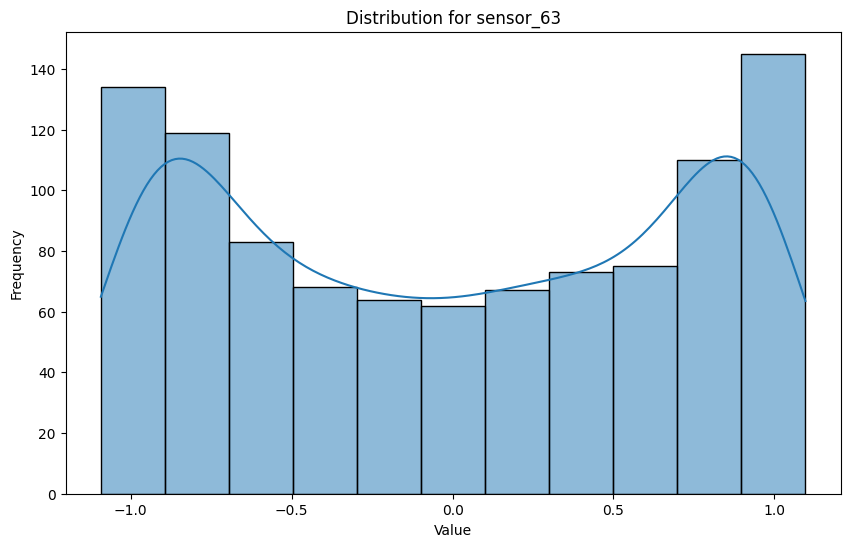

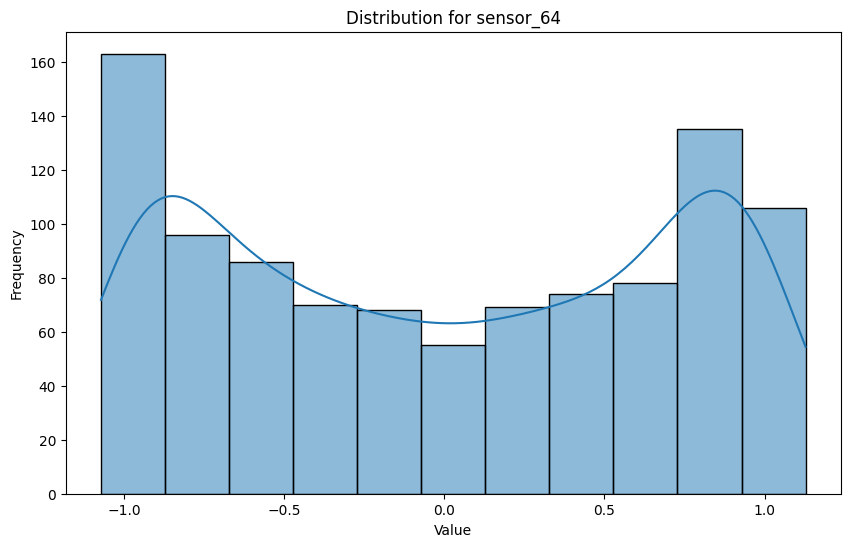

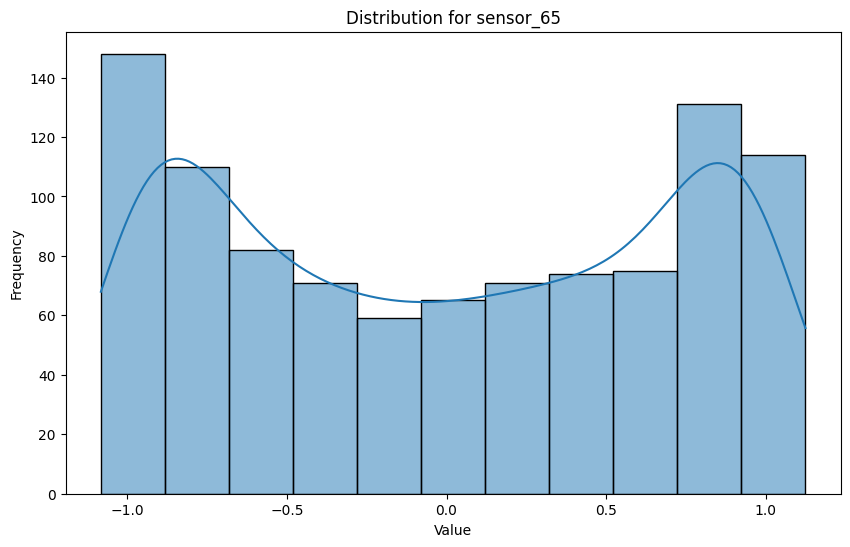

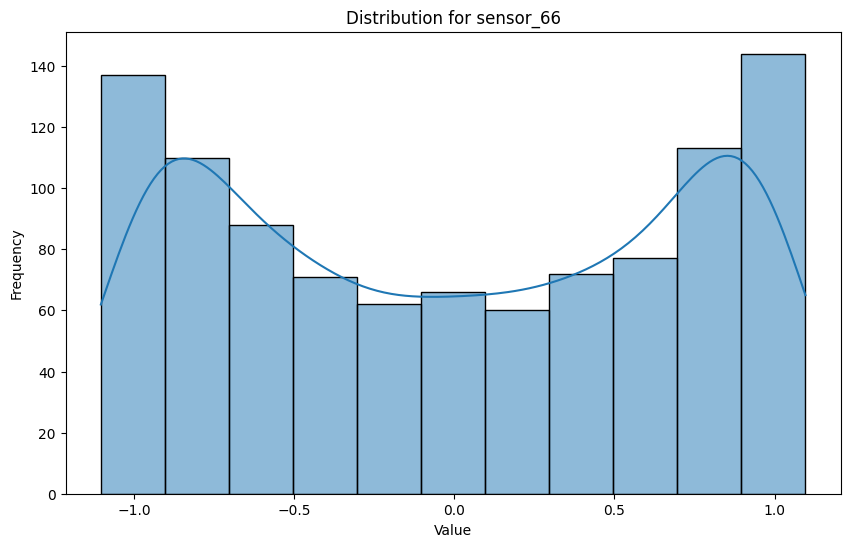

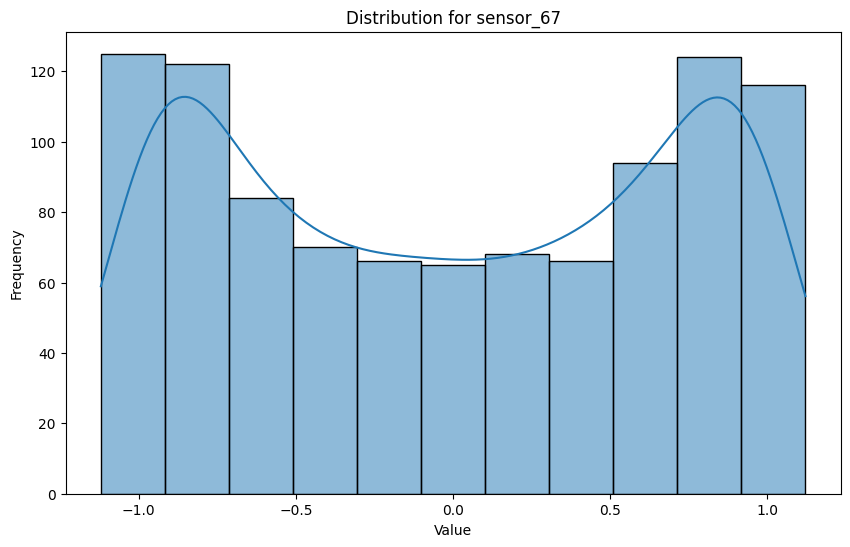

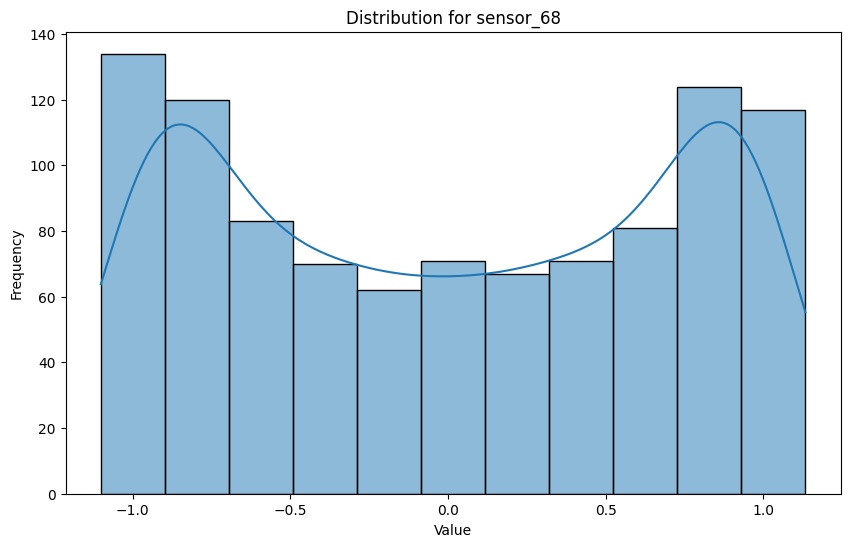

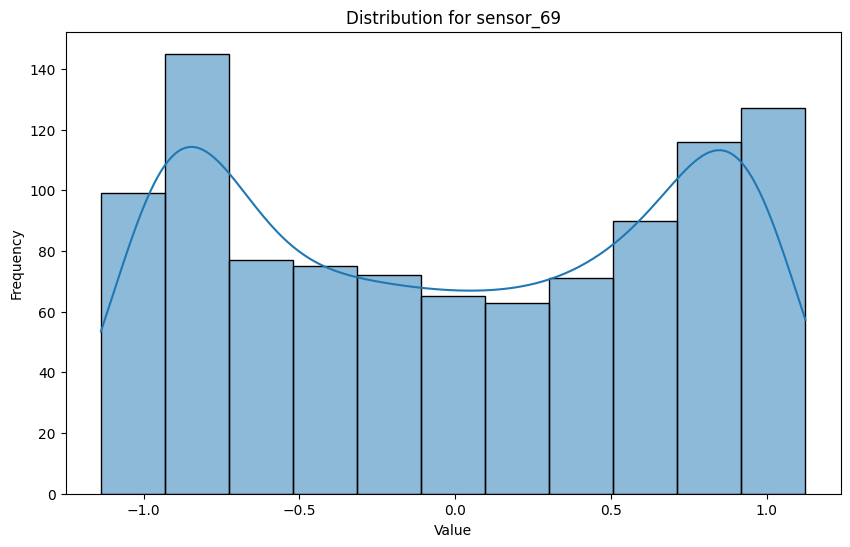

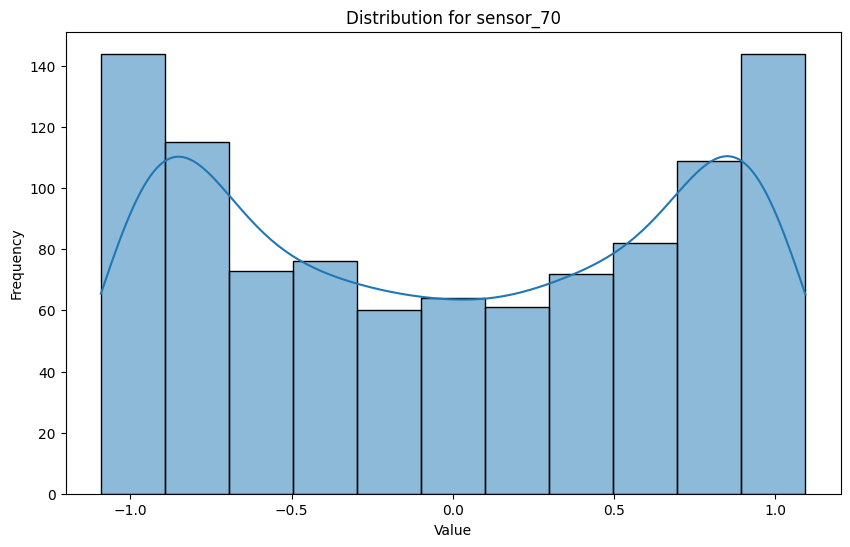

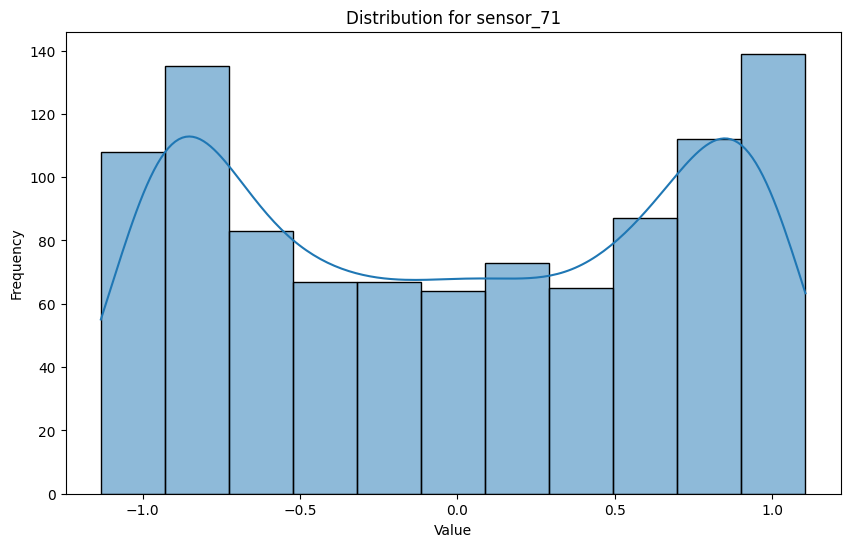

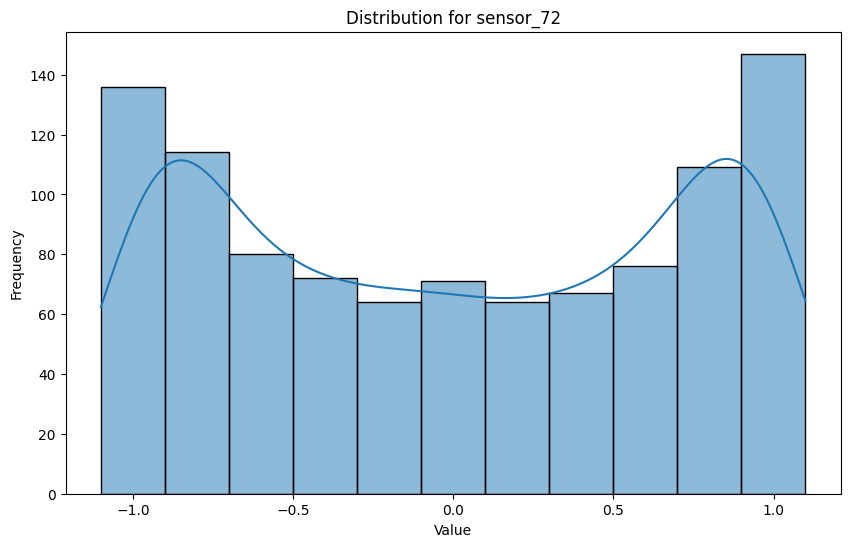

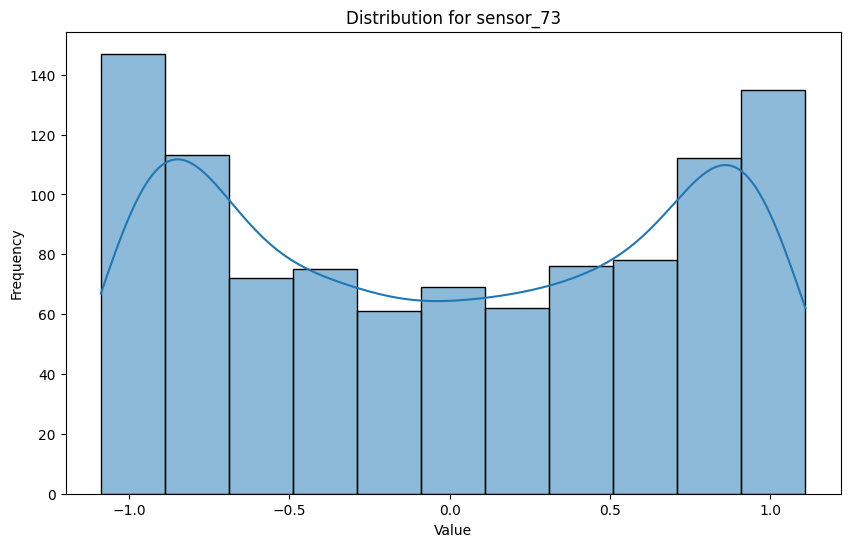

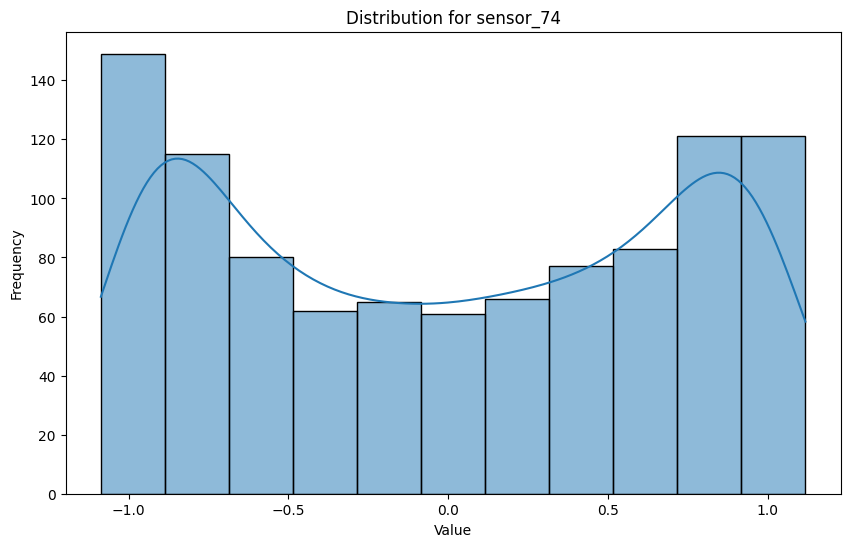

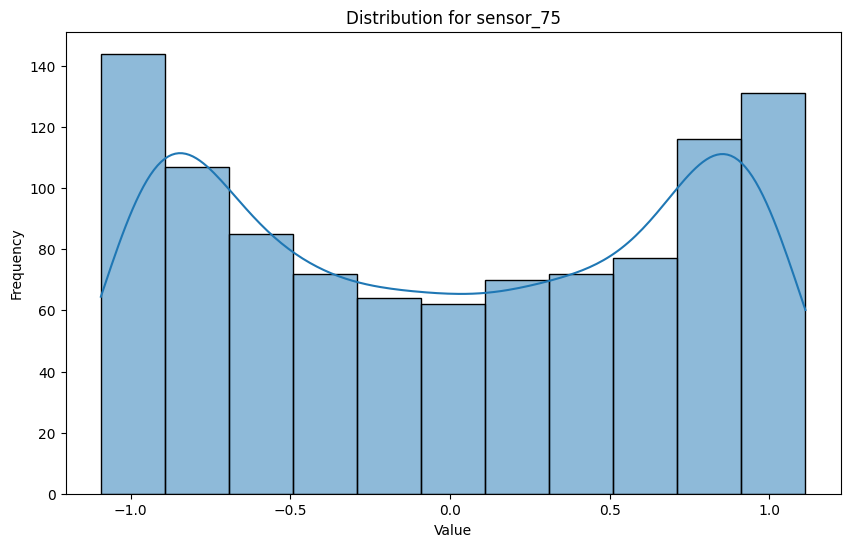

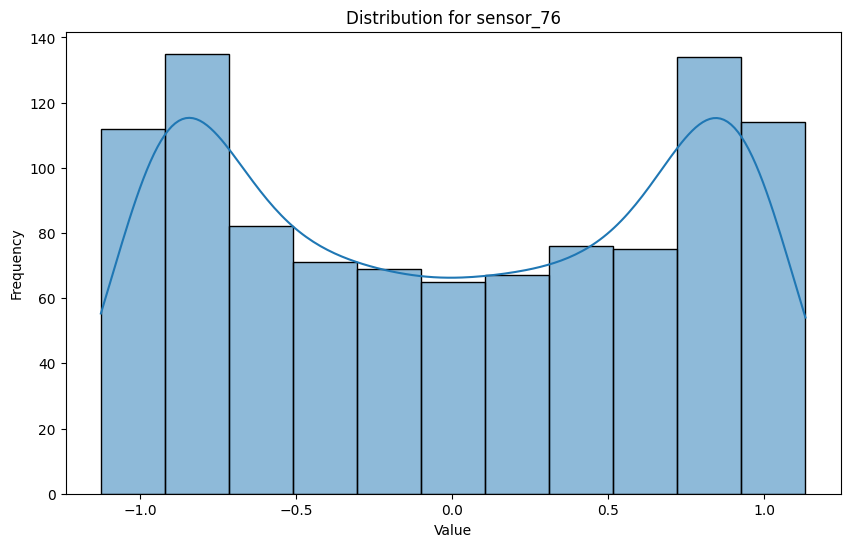

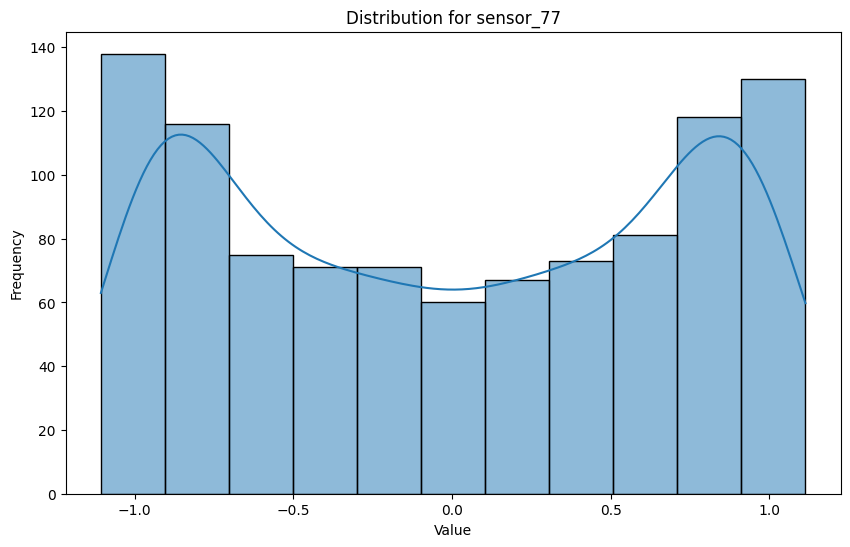

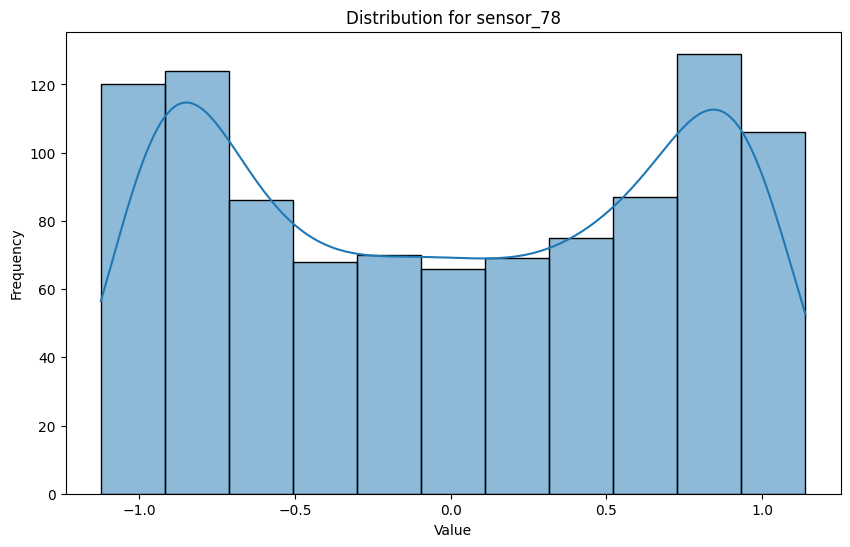

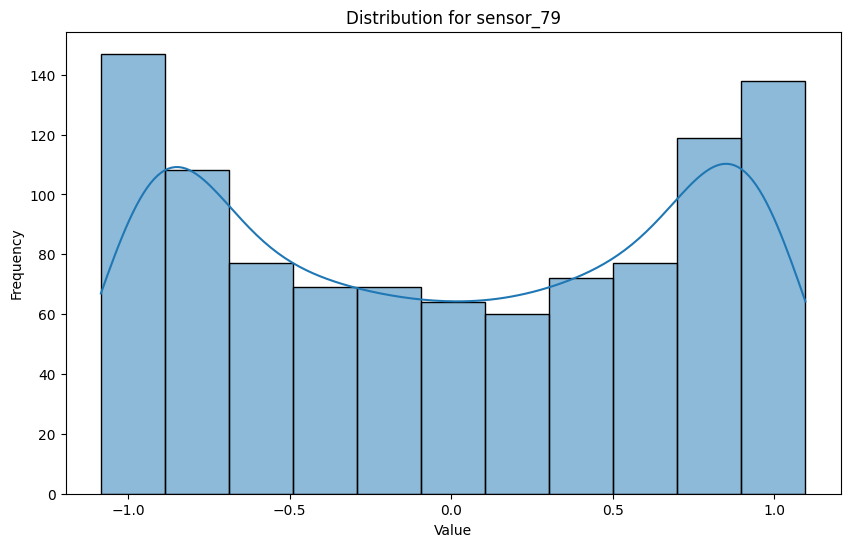

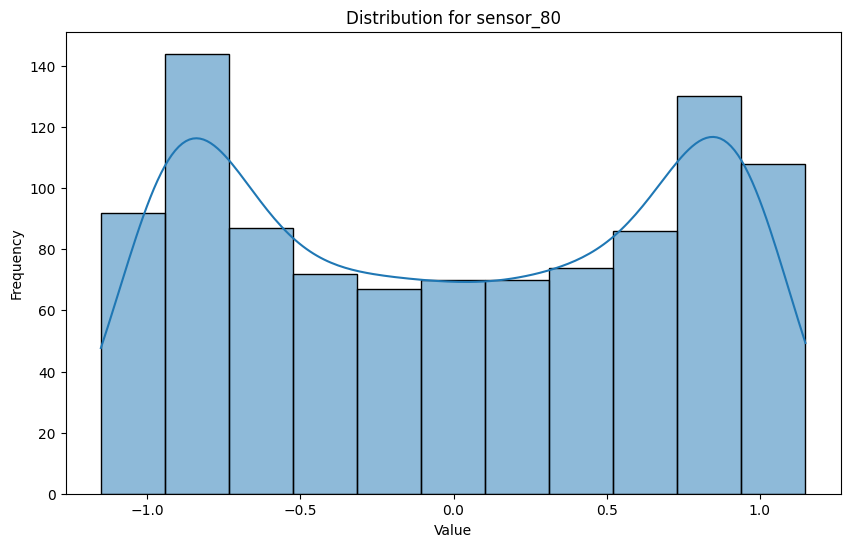

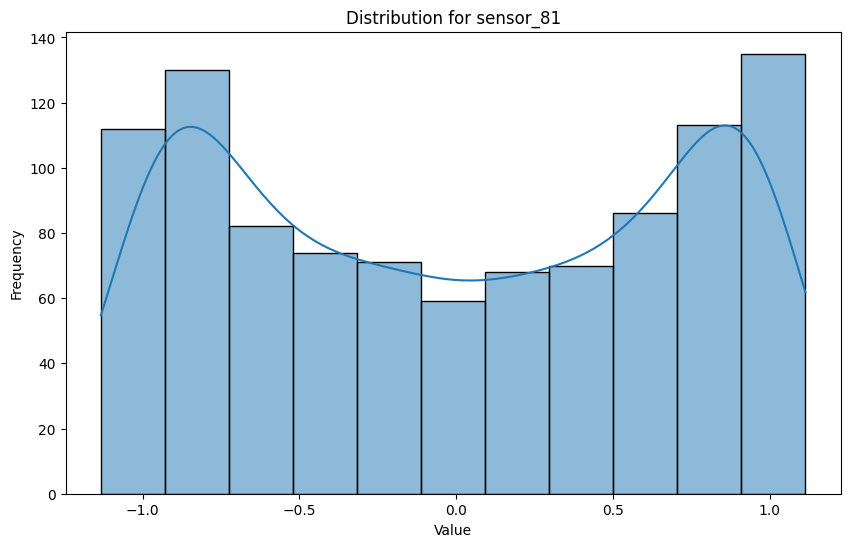

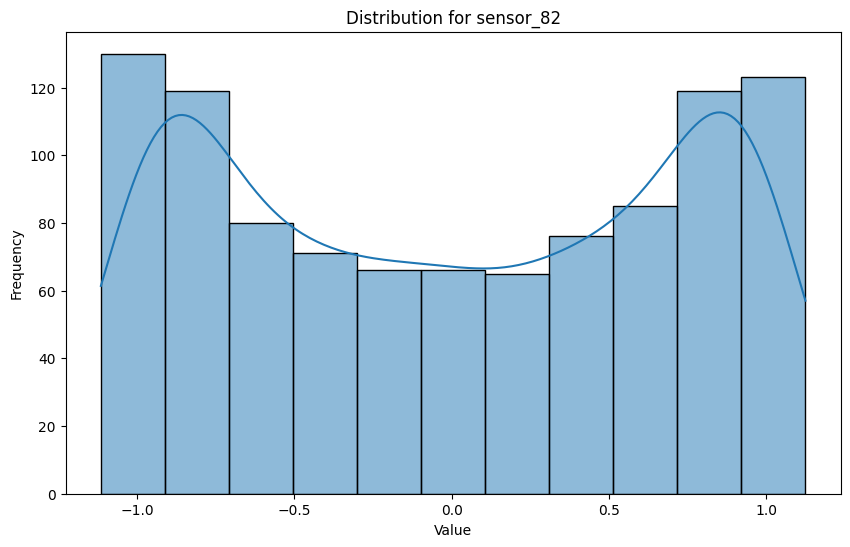

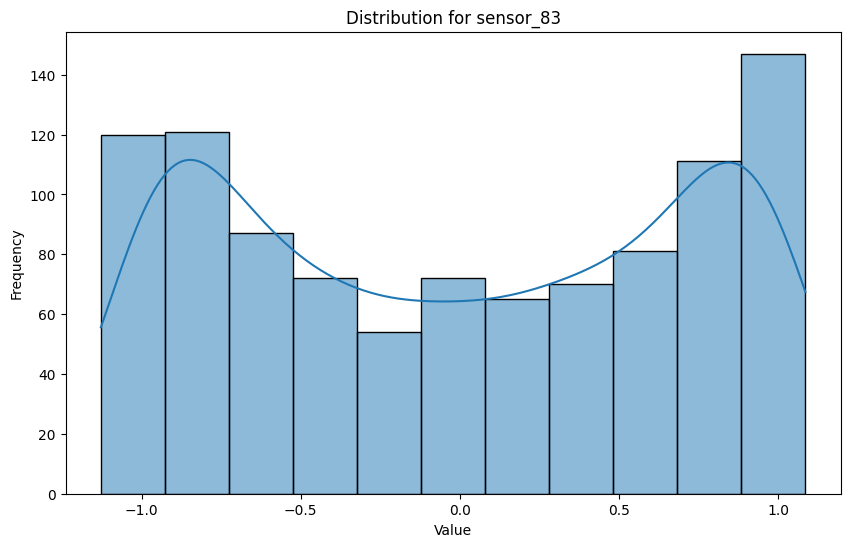

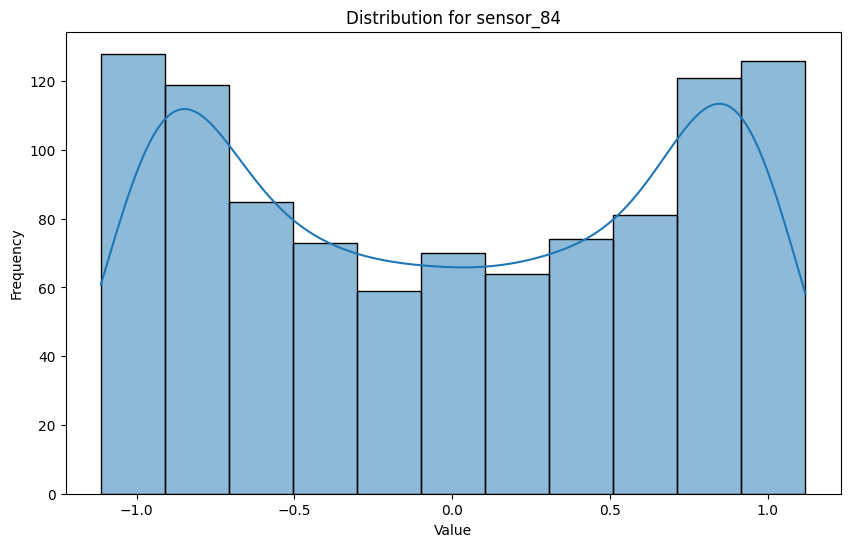

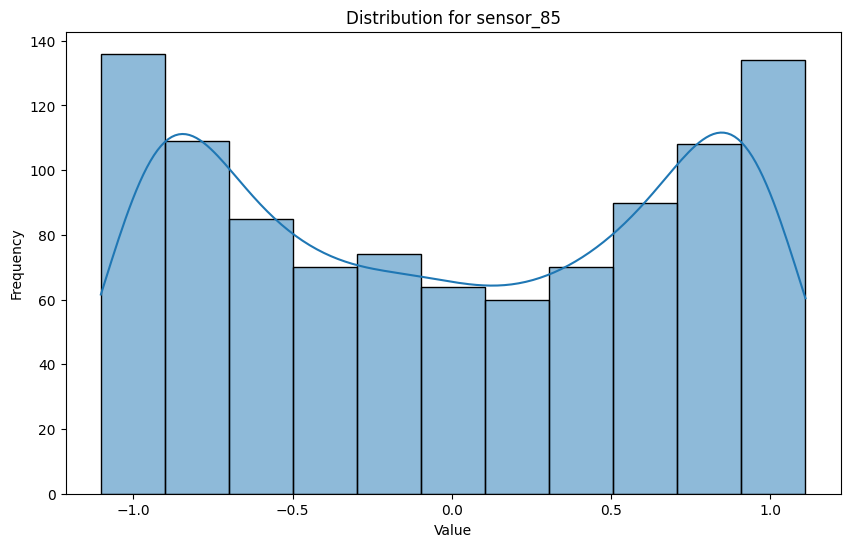

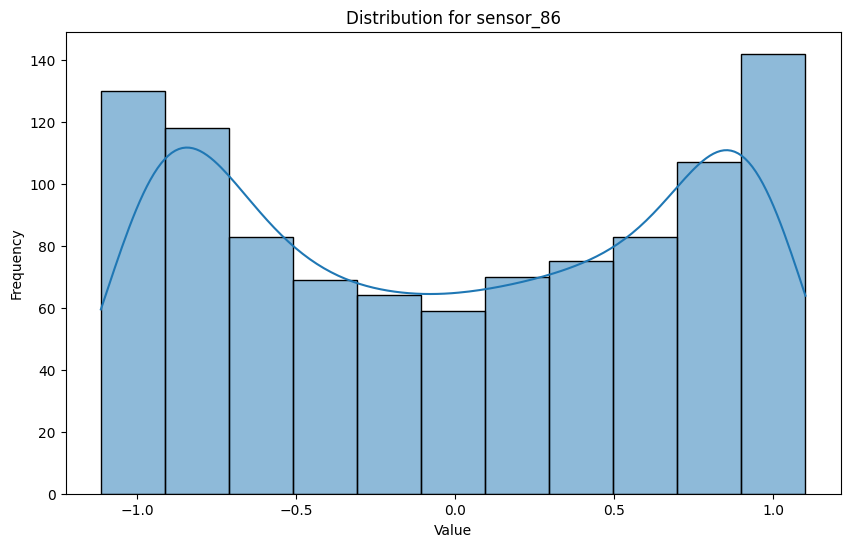

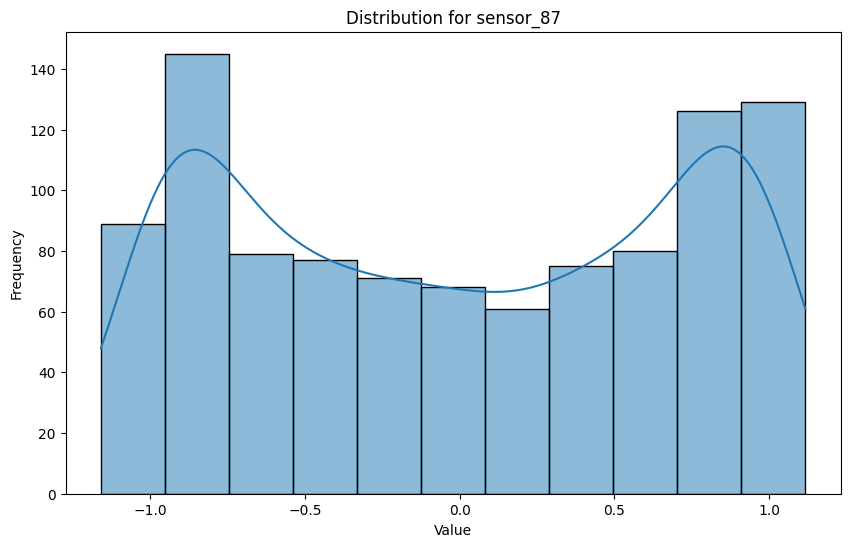

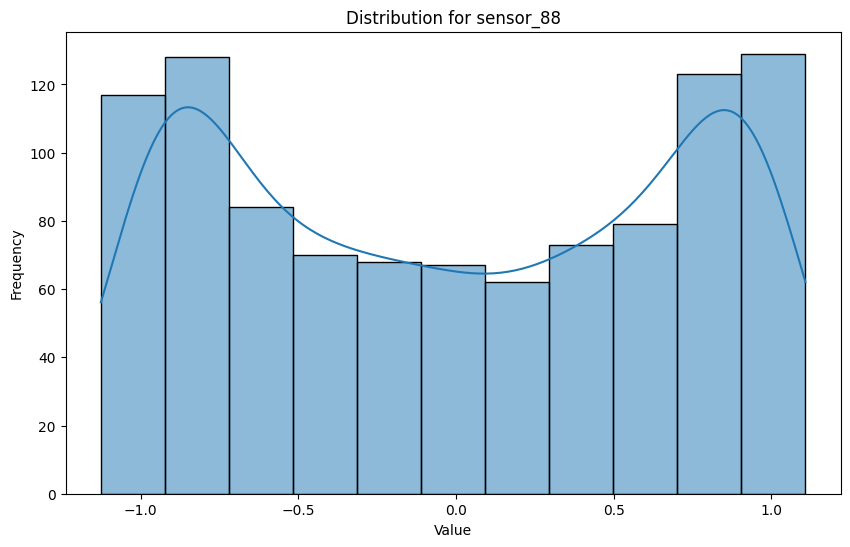

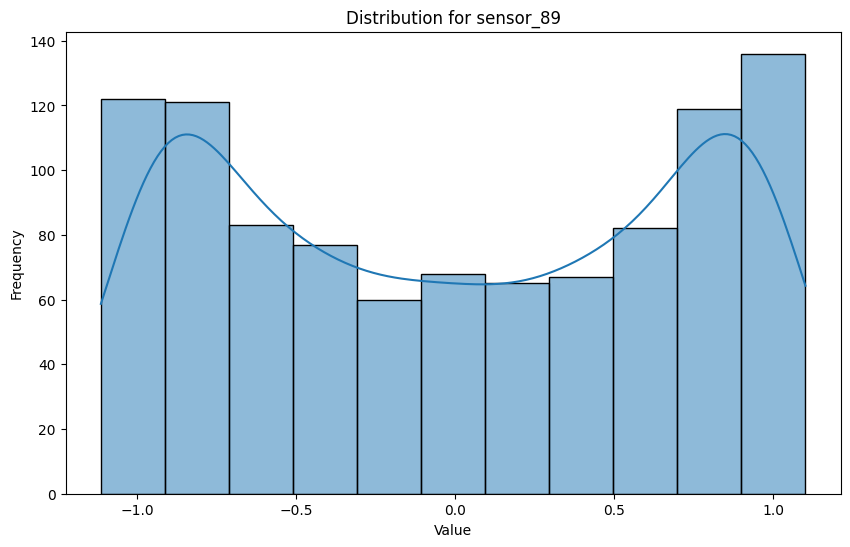

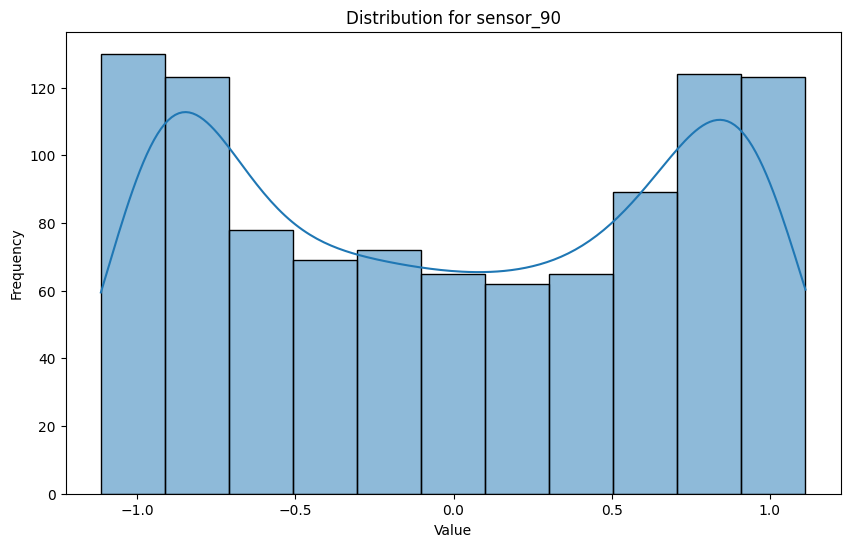

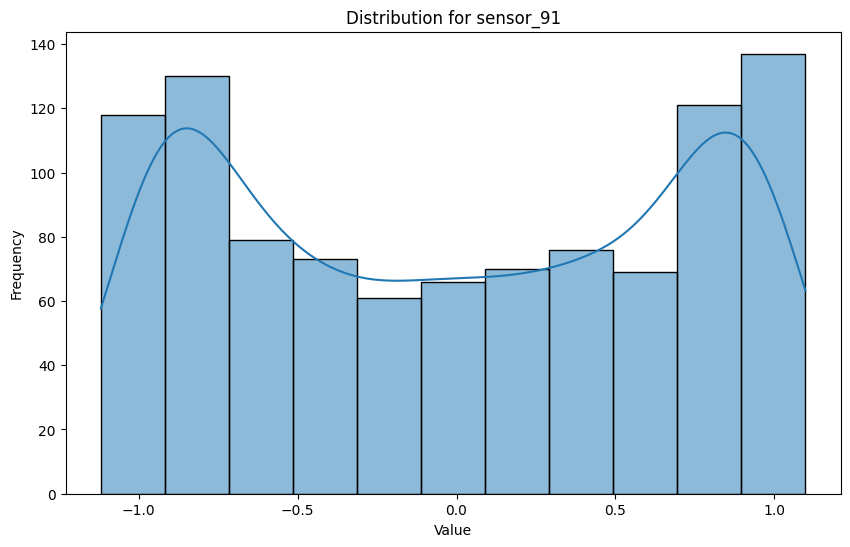

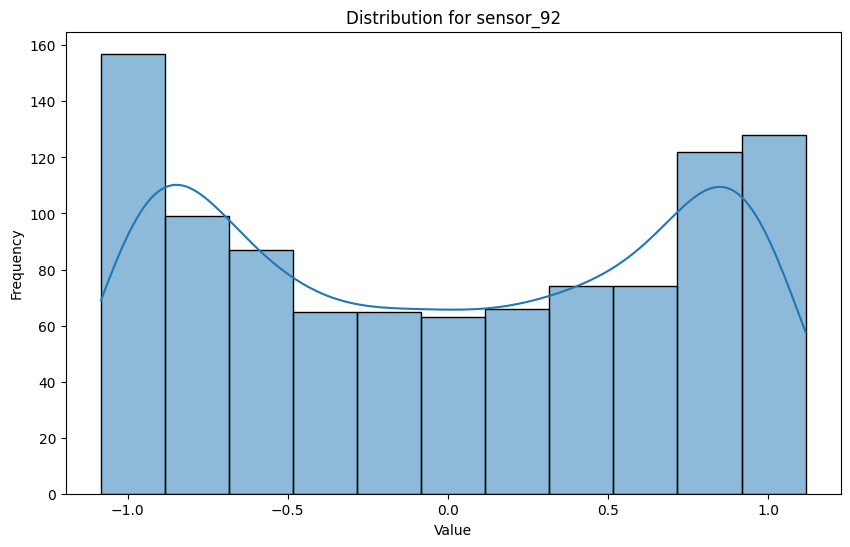

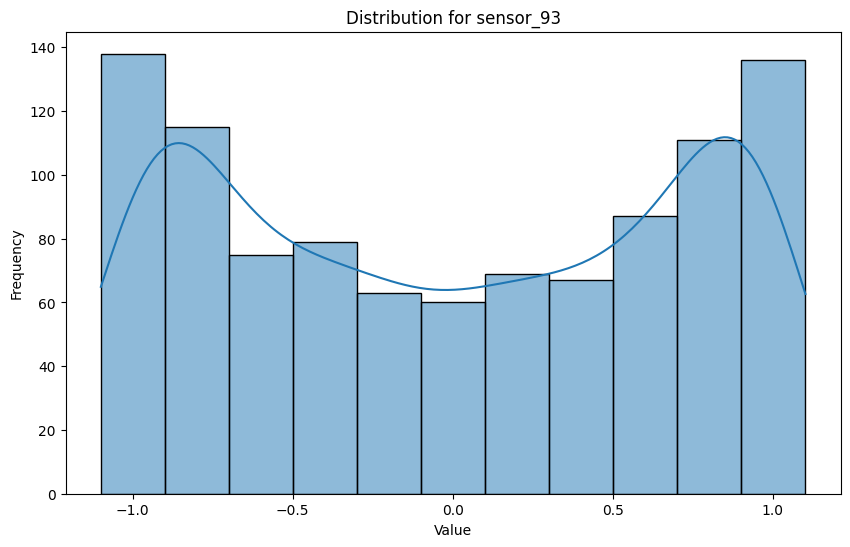

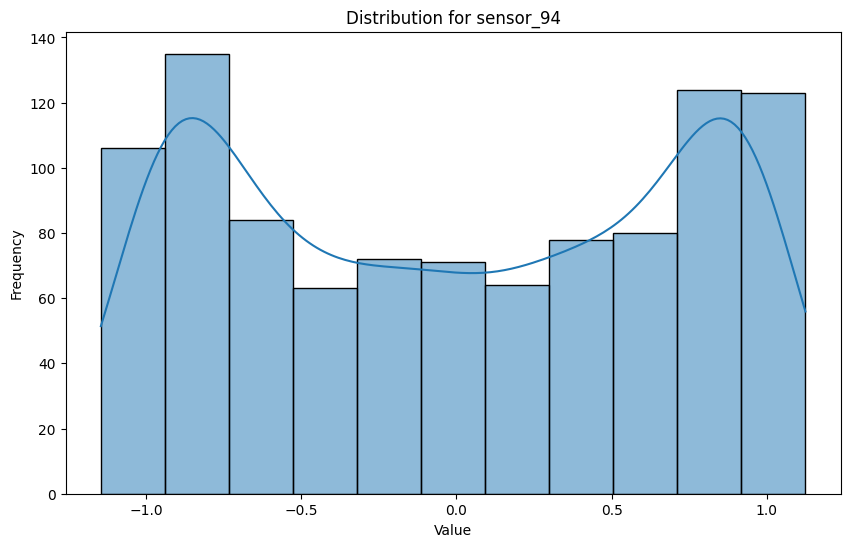

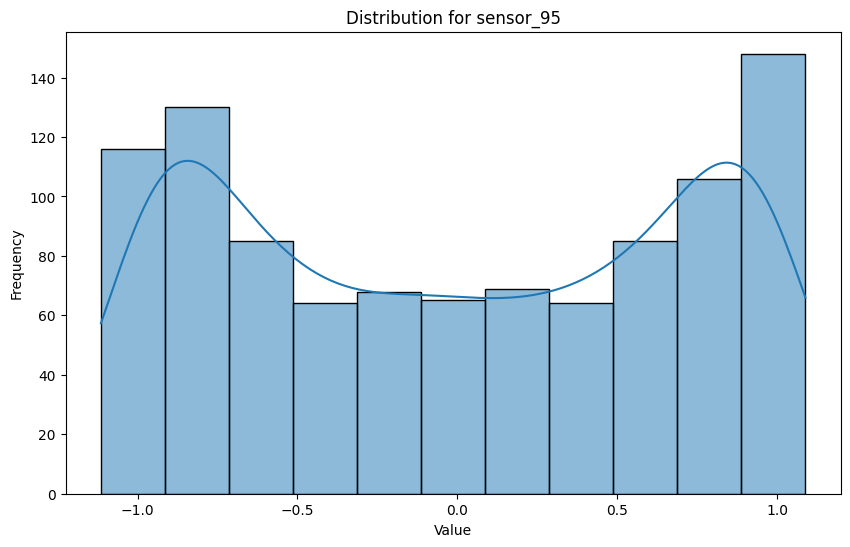

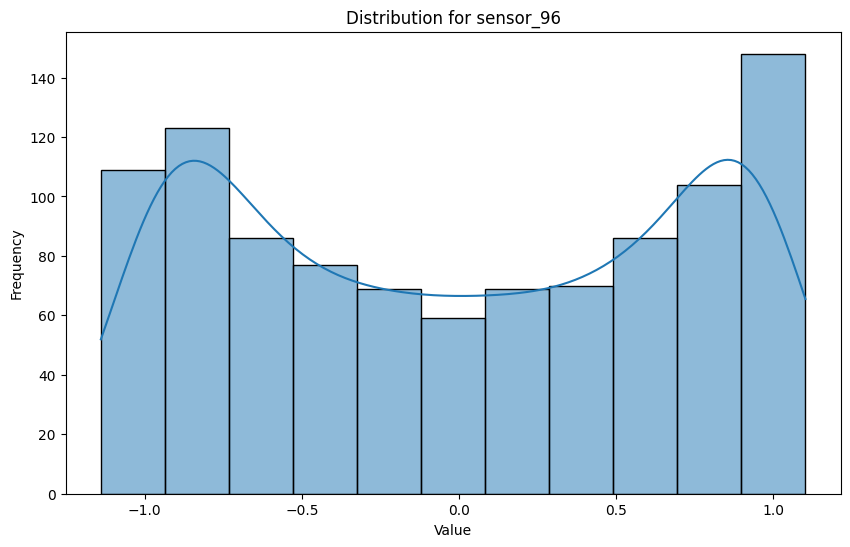

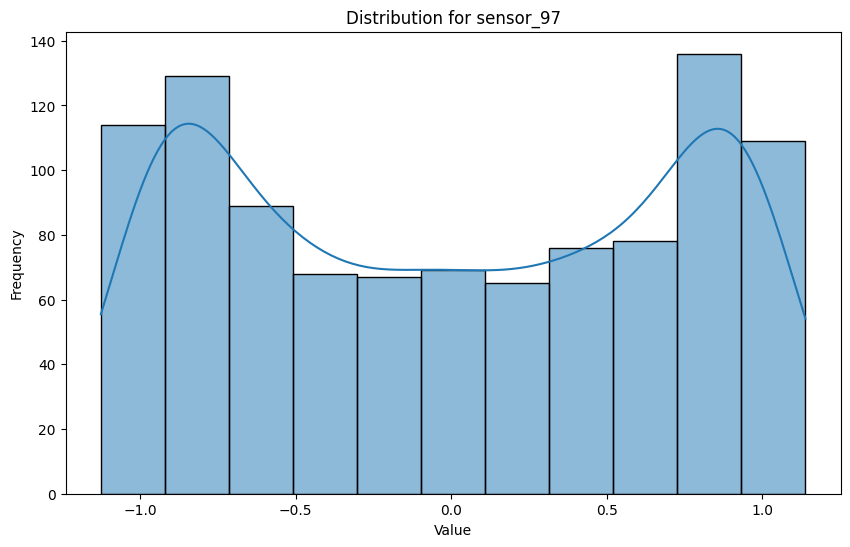

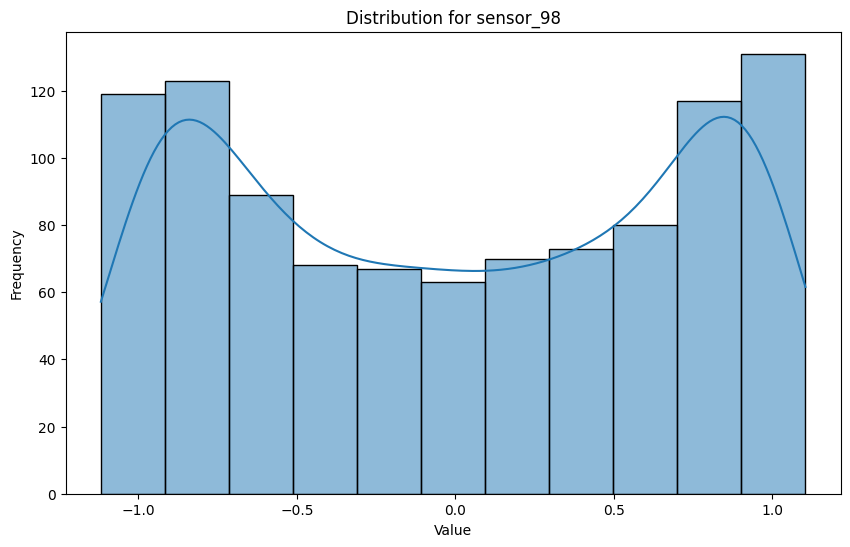

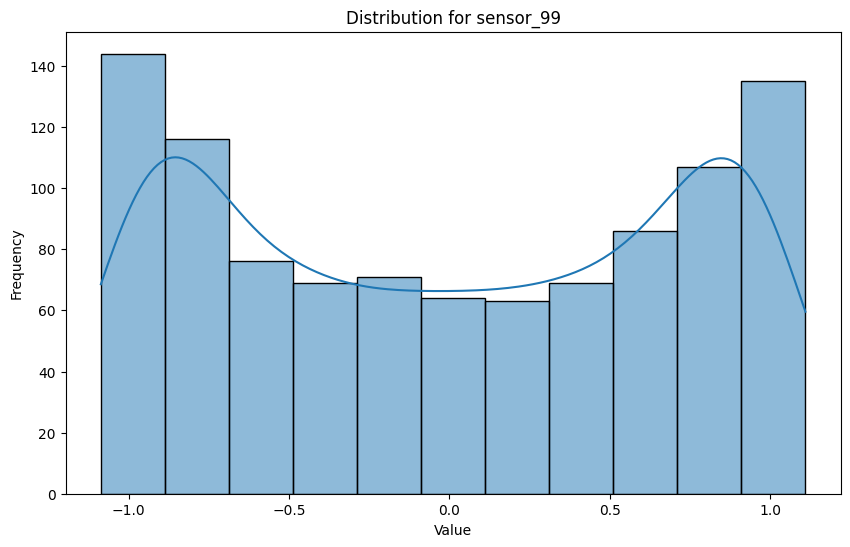

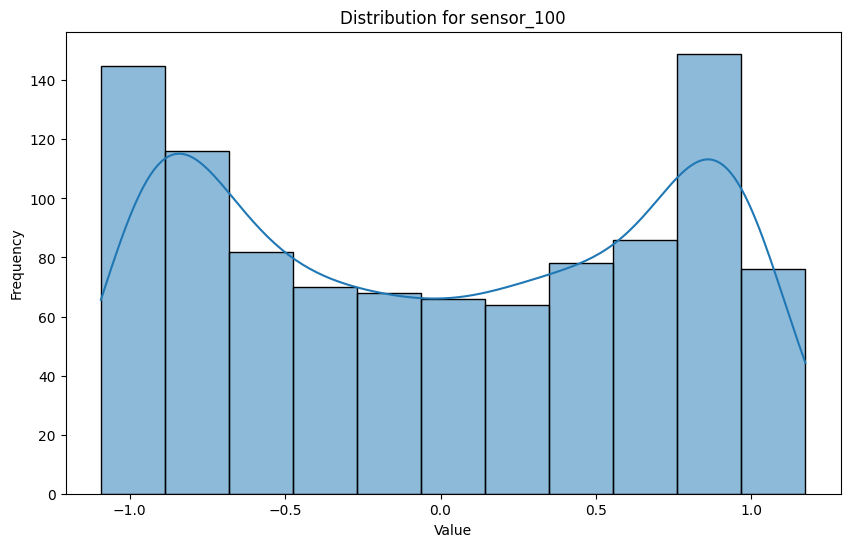

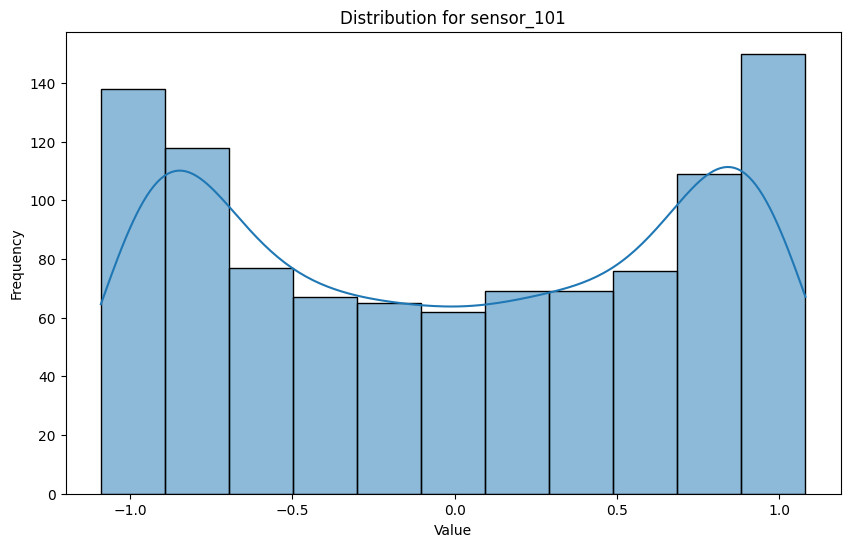

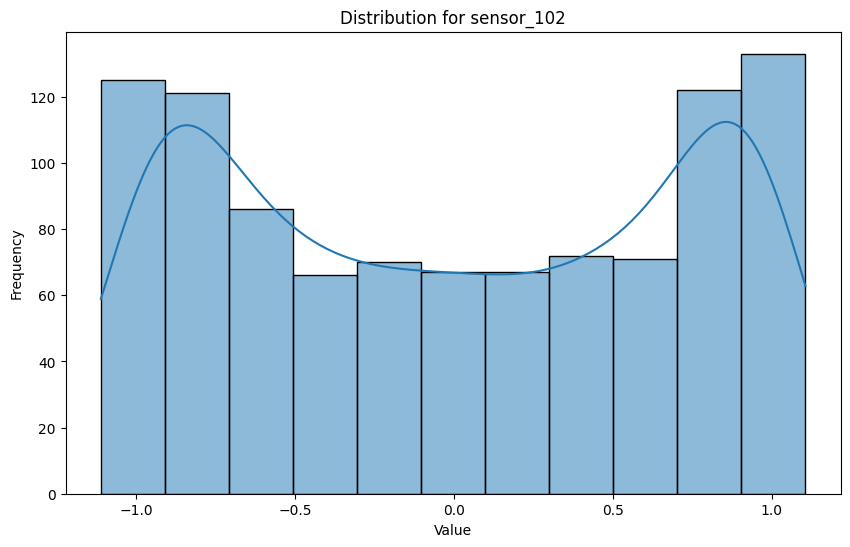

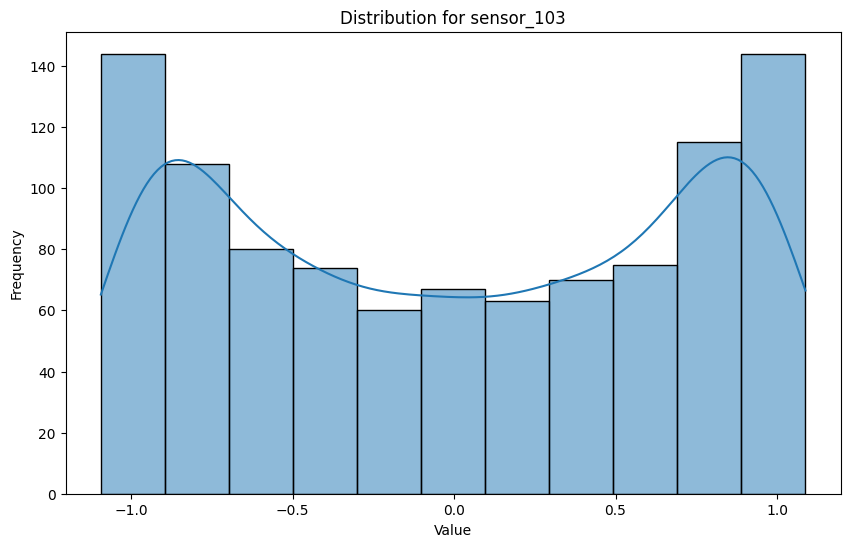

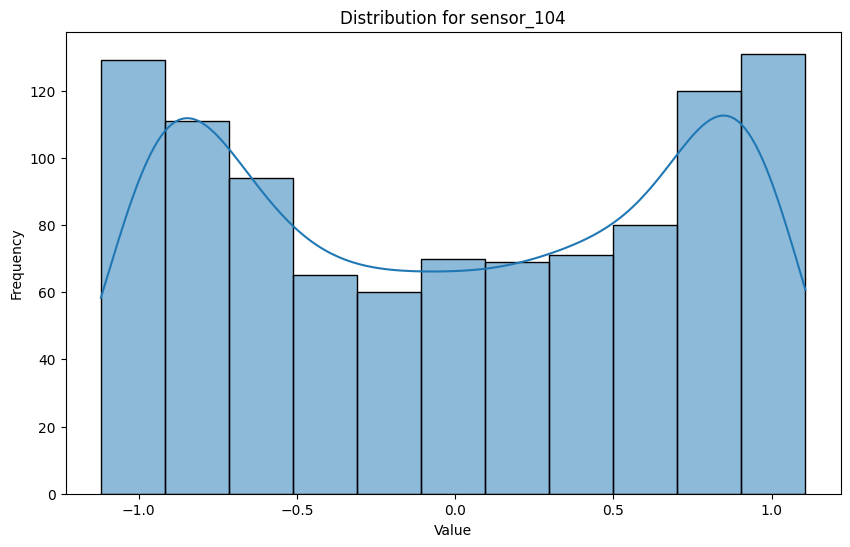

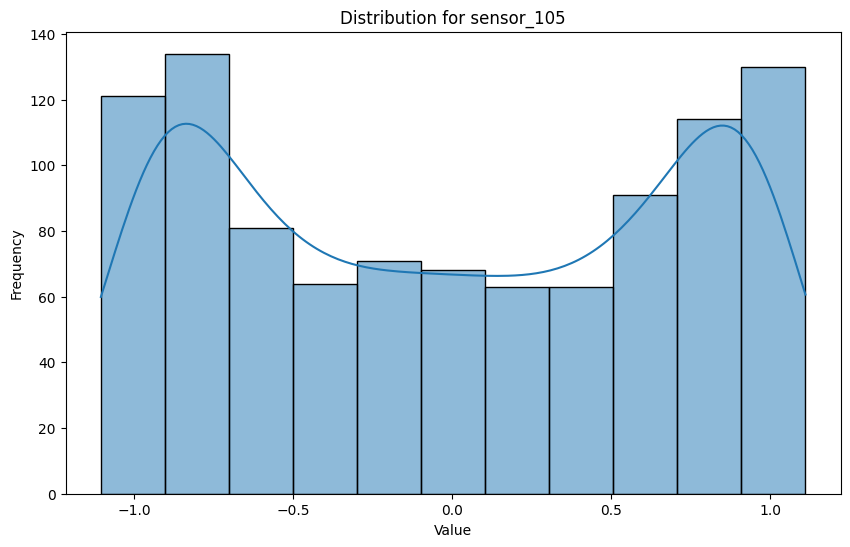

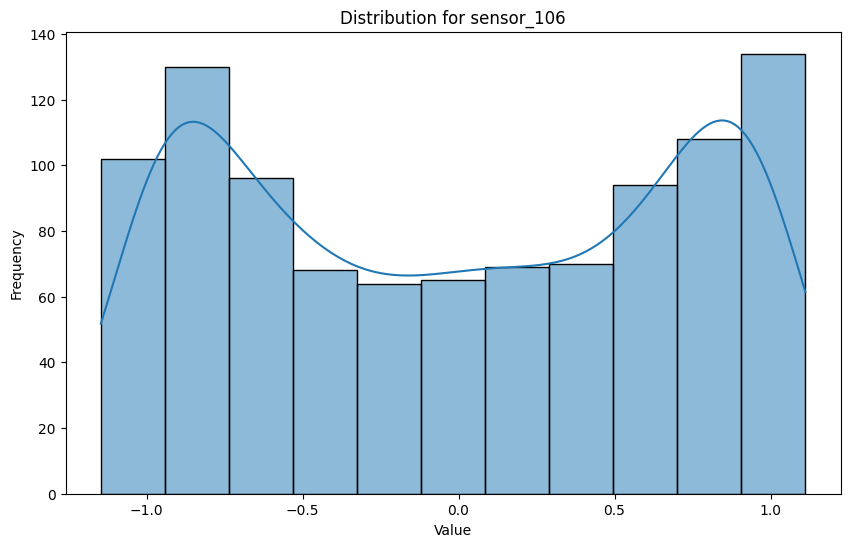

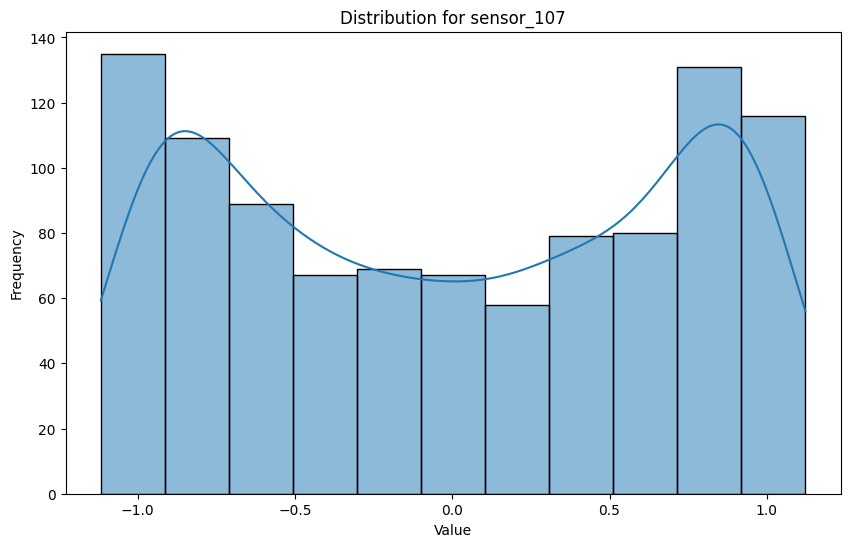

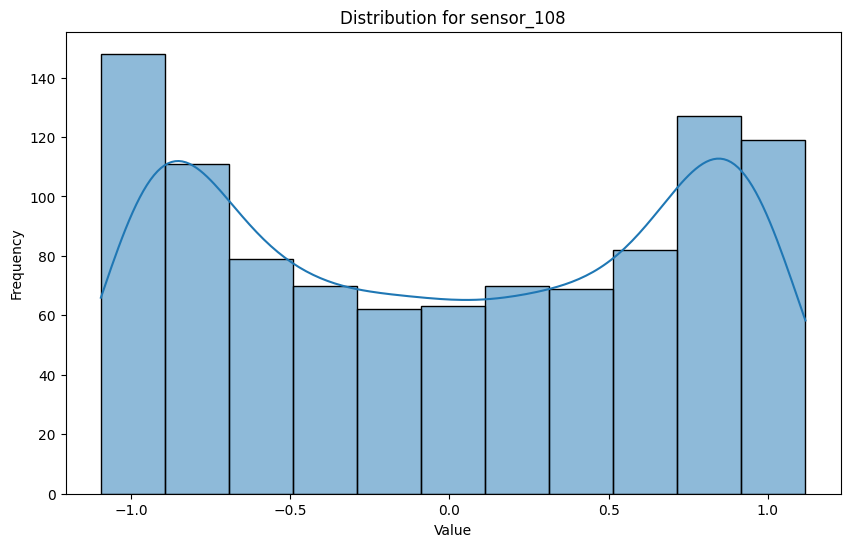

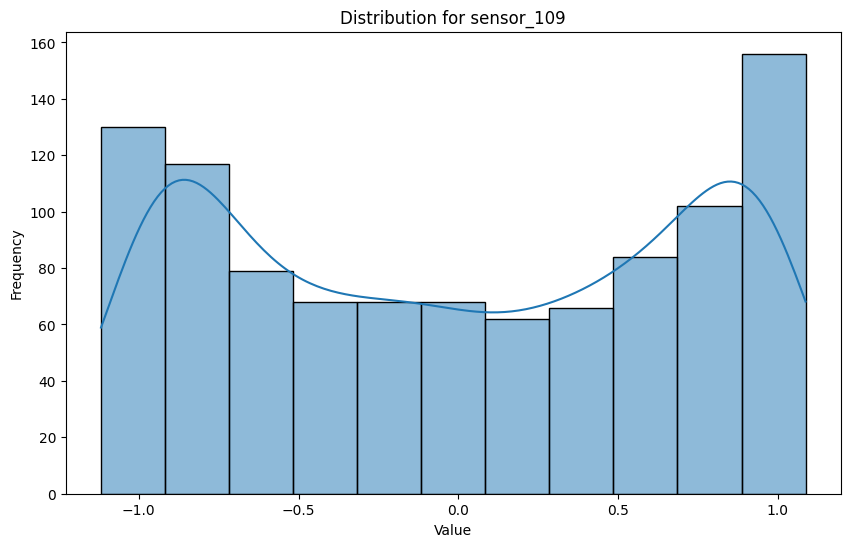

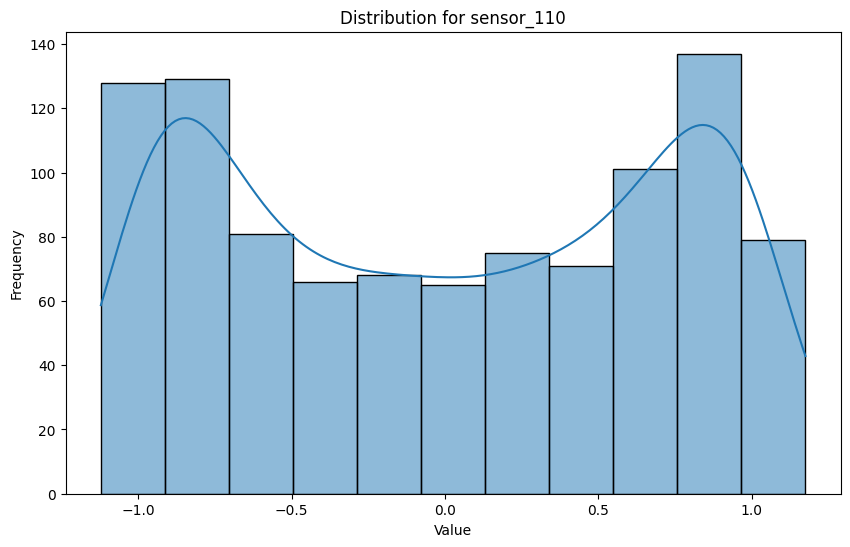

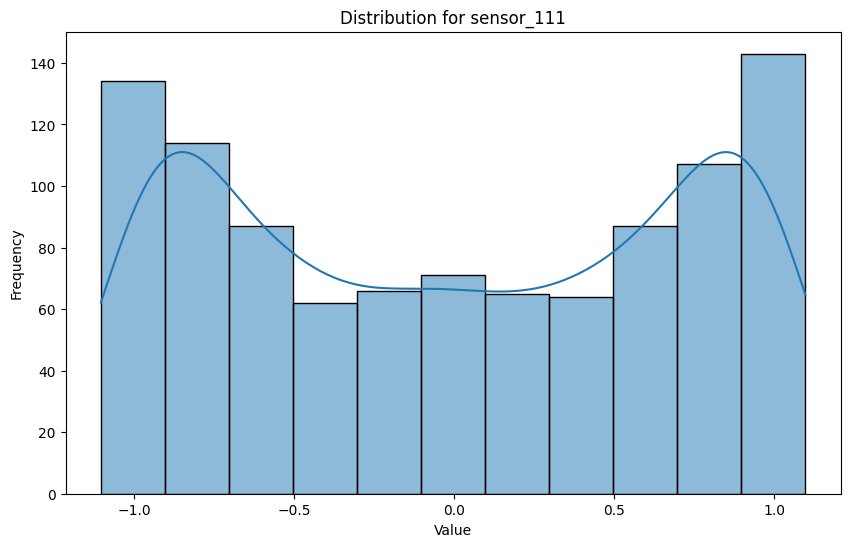

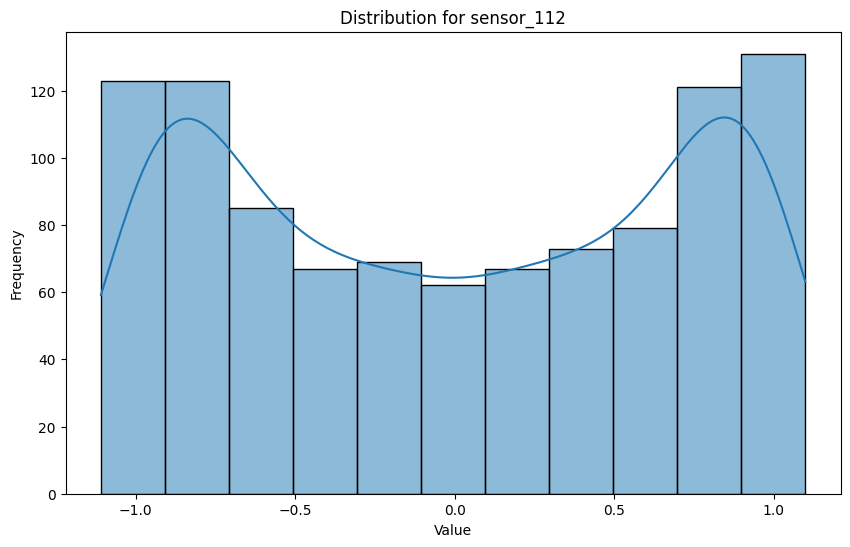

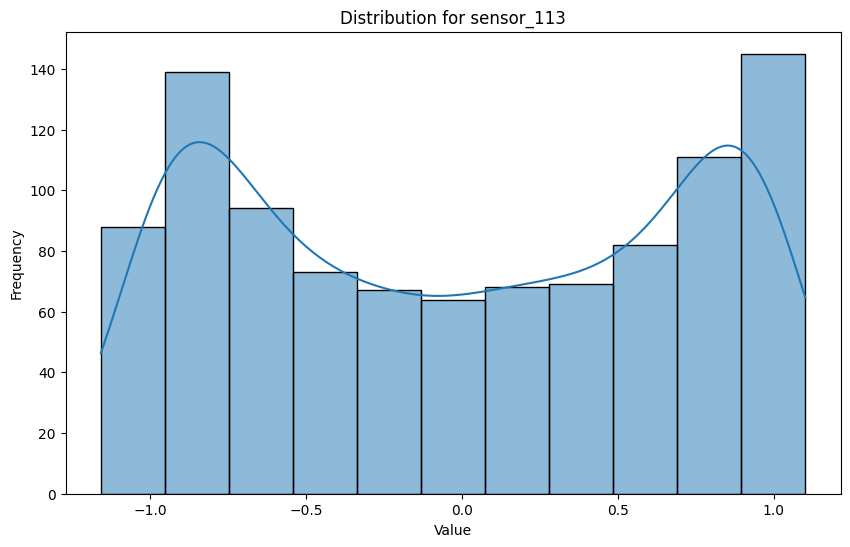

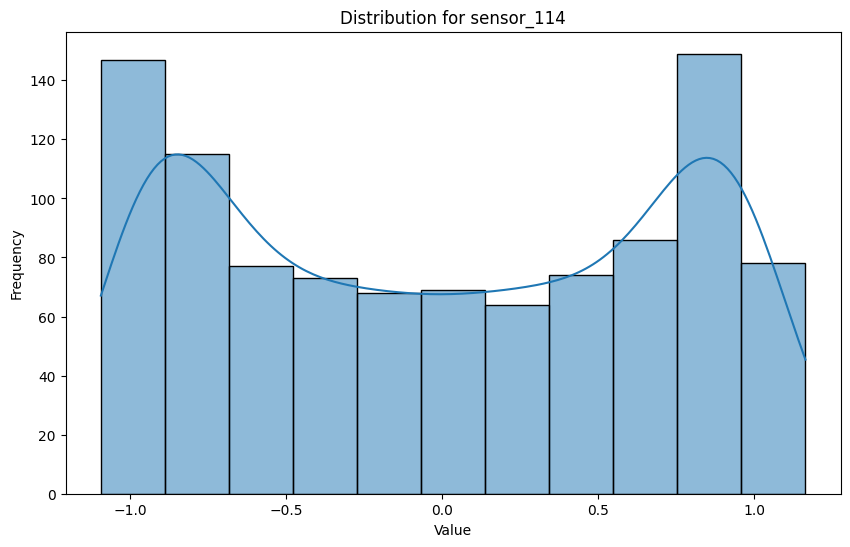

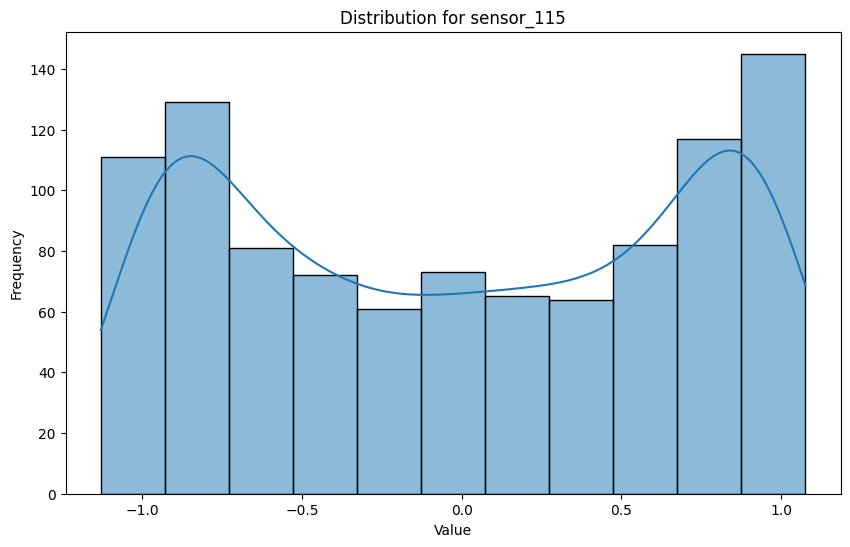

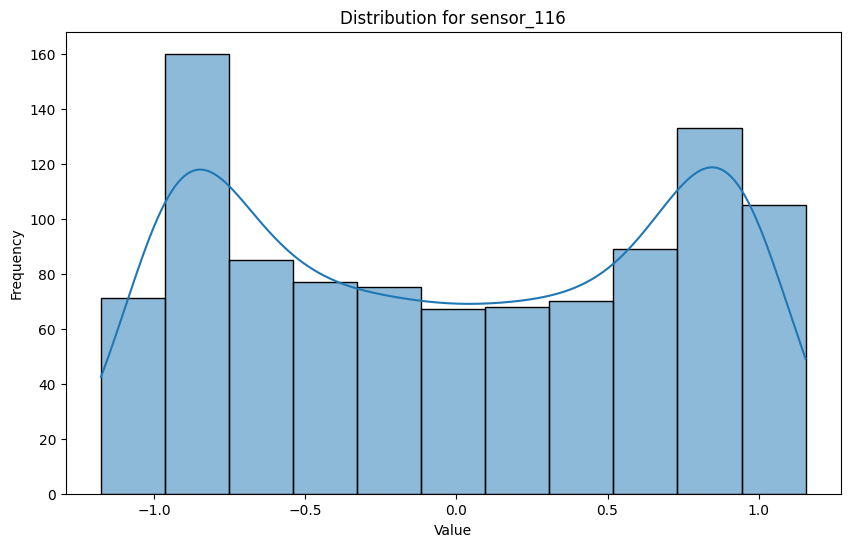

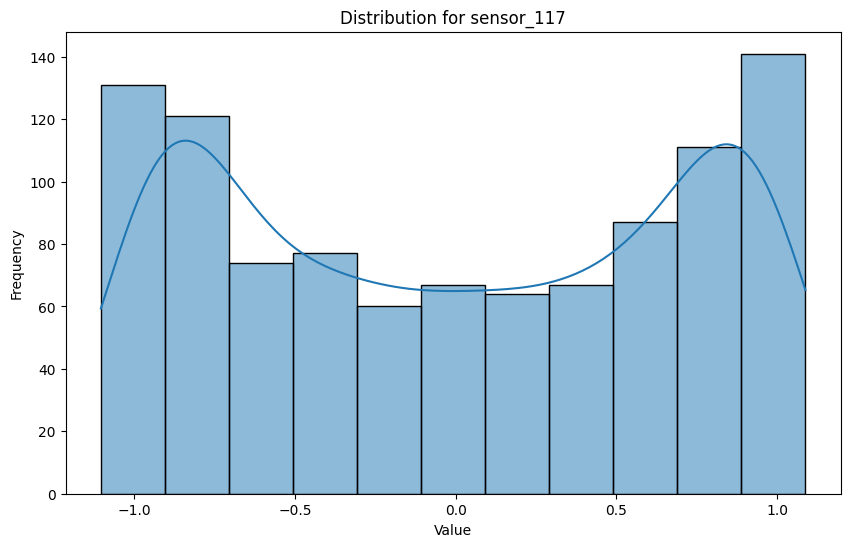

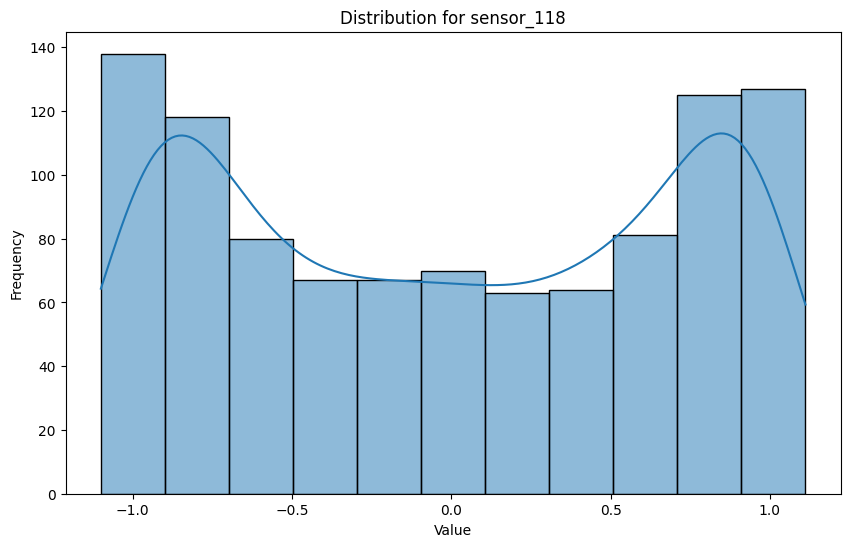

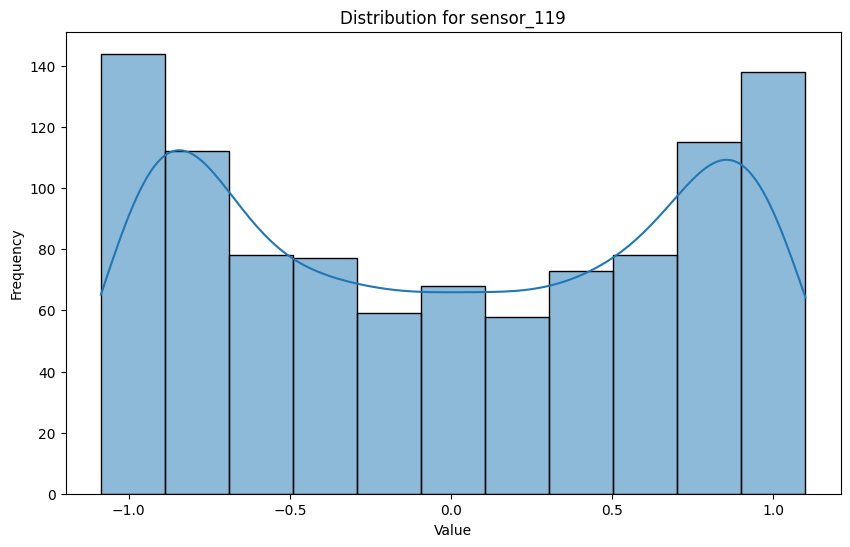

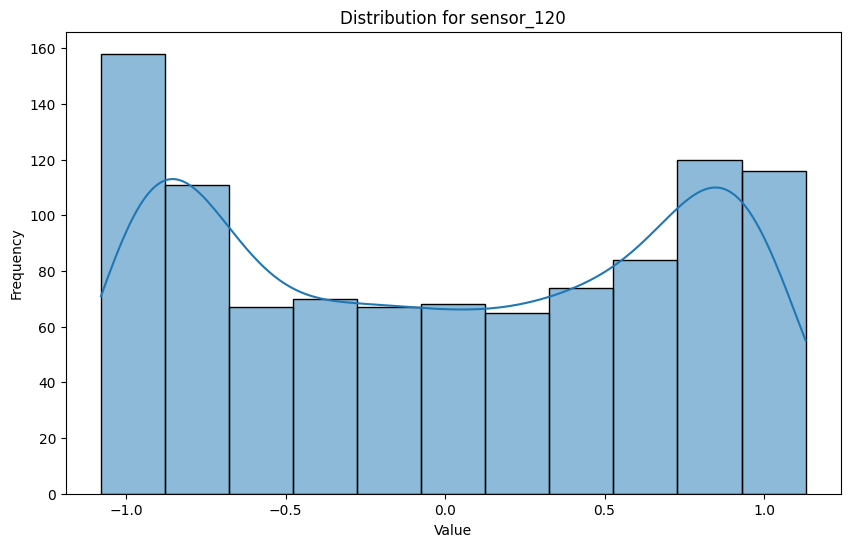

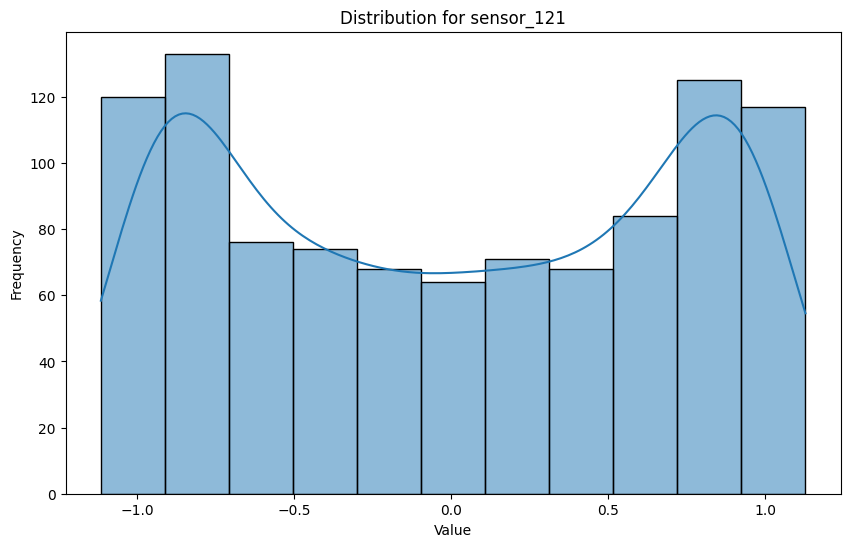

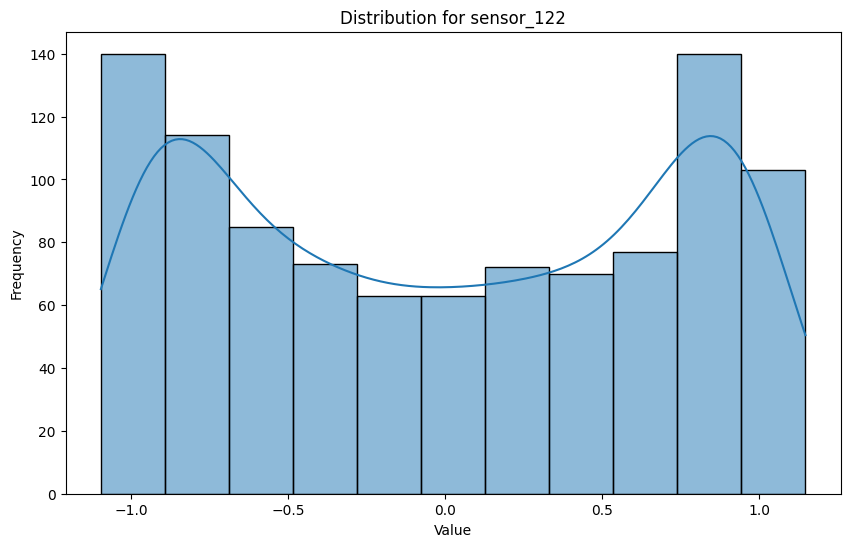

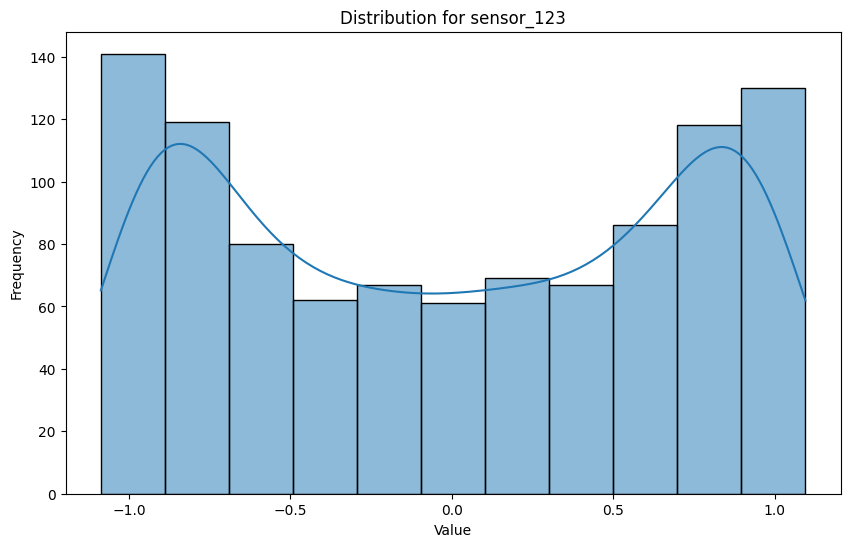

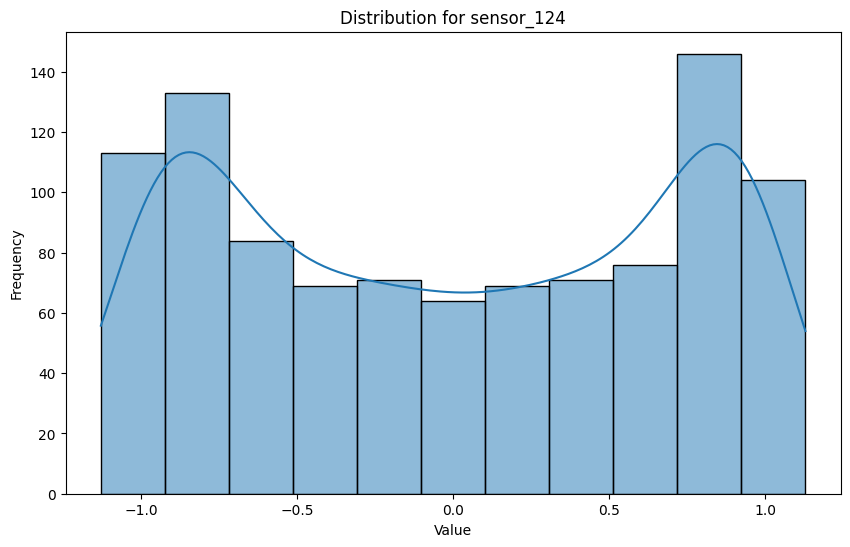

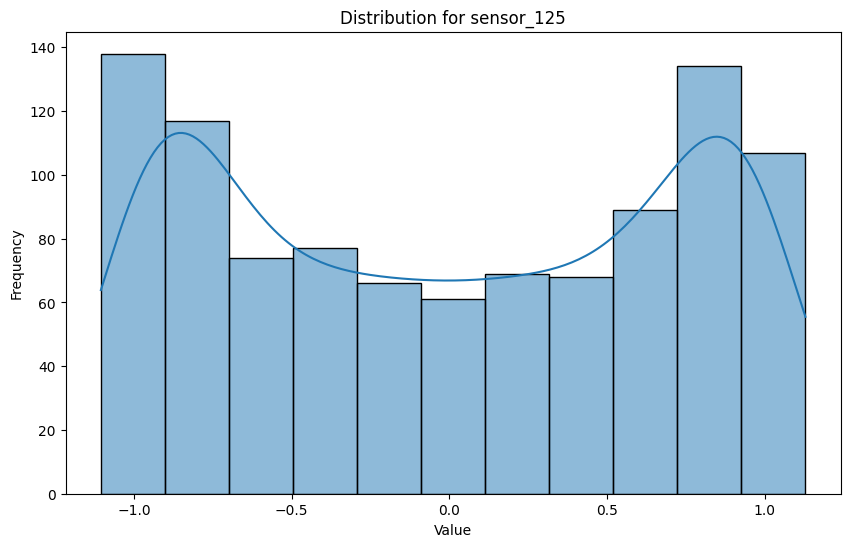

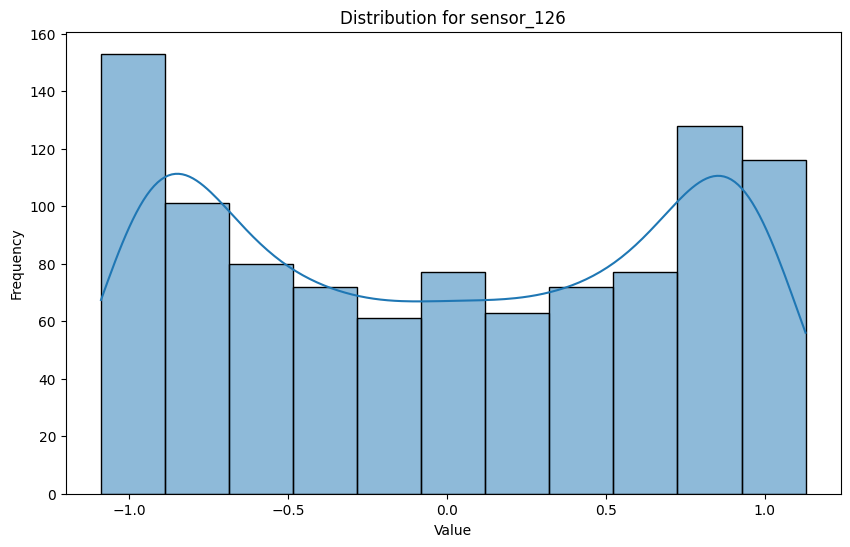

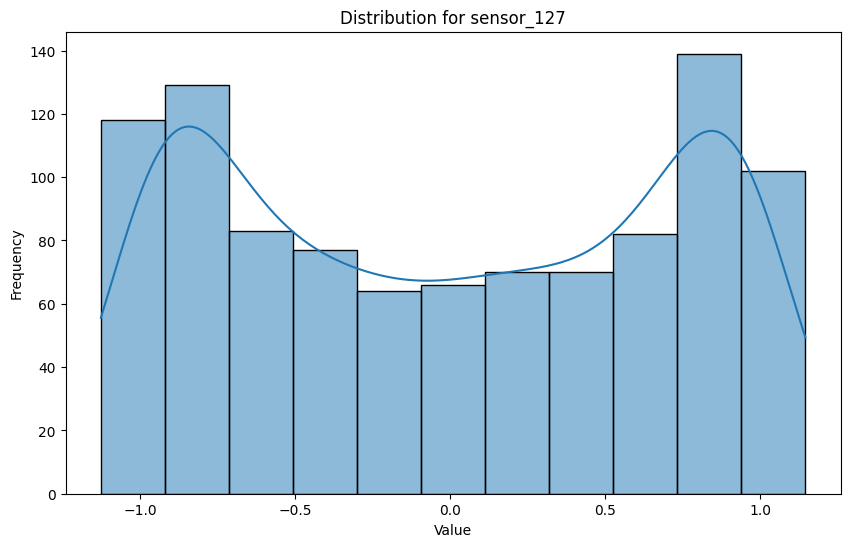

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv('/content/SephsDataV3.csv')  # Replace with your actual file path

# Visualization for Sensor Data
sensor_columns = [col for col in data.columns if 'sensor' in col]  # Adjust if necessary
sensor_data = data[sensor_columns]

# Histograms for each sensor
for sensor in sensor_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(sensor_data[sensor], kde=True)
    plt.title(f'Distribution for {sensor}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Boxplot for sensor data
plt.figure(figsize=(12, 8))
sns.boxplot(data=sensor_data)
plt.title('Boxplot for Sensor Data')
plt.xticks(rotation=90)
plt.show()

# Correlation Heatmap for sensor data
plt.figure(figsize=(12, 10))
sns.heatmap(sensor_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Sensor Data')
plt.show()

# Visualization for NLP Data
# Replace 'text_column' with your actual text column name
text_column = 'text'  # Adjust if necessary
text_data = data[text_column].dropna()  # Drop NaN if any

# Word Cloud for text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Data')
plt.show()